In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns
import itertools
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

import itertools
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import BaggingRegressor
from mlxtend.evaluate import bias_variance_decomp
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train = pd.read_csv('/data/train.csv')
train.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
train.shape

(42100, 19)

In [4]:
test = pd.read_csv('data/test.csv')
test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [5]:
train.dtypes


id                                        int64
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

In [6]:
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [7]:
# train = pd.concat([train.drop('id', axis = 1)], axis = 0)
# train.reset_index(drop = True, inplace = True)
# train.drop_duplicates(inplace = True)


In [8]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_adults,42100.0,1.920713,0.524950,0.0,2.0,2.00,2.0,4.0
no_of_children,42100.0,0.141093,0.450128,0.0,0.0,0.00,0.0,9.0
no_of_weekend_nights,42100.0,0.884632,0.885693,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,42100.0,2.398005,1.427330,0.0,1.0,2.00,3.0,17.0
type_of_meal_plan,42100.0,0.239192,0.587674,0.0,0.0,0.00,0.0,3.0
required_car_parking_space,42100.0,0.025249,0.156884,0.0,0.0,0.00,0.0,1.0
room_type_reserved,42100.0,0.428931,0.832605,0.0,0.0,0.00,1.0,6.0
lead_time,42100.0,103.888029,81.069343,0.0,37.0,93.00,155.0,443.0
arrival_year,42100.0,2017.856295,0.350795,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,42100.0,7.593539,2.829395,1.0,6.0,8.00,10.0,12.0


# EDA

In [9]:
# Counting Unique value and Missing value and embedding into one table for better understanding.

unique_count = []
for x in train.columns:
    unique_count.append([x, len(train[x].unique()), train[x].isnull().sum()])
pd.DataFrame(unique_count, columns=['Column', 'Unique', 'Missing']).set_index('Column')

,Unique,Missing
Column,,
no_of_adults,5,0
no_of_children,6,0
no_of_weekend_nights,8,0
no_of_week_nights,18,0
type_of_meal_plan,4,0
required_car_parking_space,2,0
room_type_reserved,7,0
lead_time,338,0
arrival_year,2,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42100 non-null  int64  
 1   no_of_children                        42100 non-null  int64  
 2   no_of_weekend_nights                  42100 non-null  int64  
 3   no_of_week_nights                     42100 non-null  int64  
 4   type_of_meal_plan                     42100 non-null  int64  
 5   required_car_parking_space            42100 non-null  int64  
 6   room_type_reserved                    42100 non-null  int64  
 7   lead_time                             42100 non-null  int64  
 8   arrival_year                          42100 non-null  int64  
 9   arrival_month                         42100 non-null  int64  
 10  arrival_date                          42100 non-null  int64  
 11  market_segment_

In [11]:
cat_features = np.array([i for i in train.columns.tolist() if train[i].dtype == 'object'])
num_features = np.array([i for i in train.columns.tolist() if train[i].dtype != 'object'])

print("Number features column =" , len(num_features))
print("Categorial features column =" , len(cat_features))

Number features column = 18
Categorial features column = 0


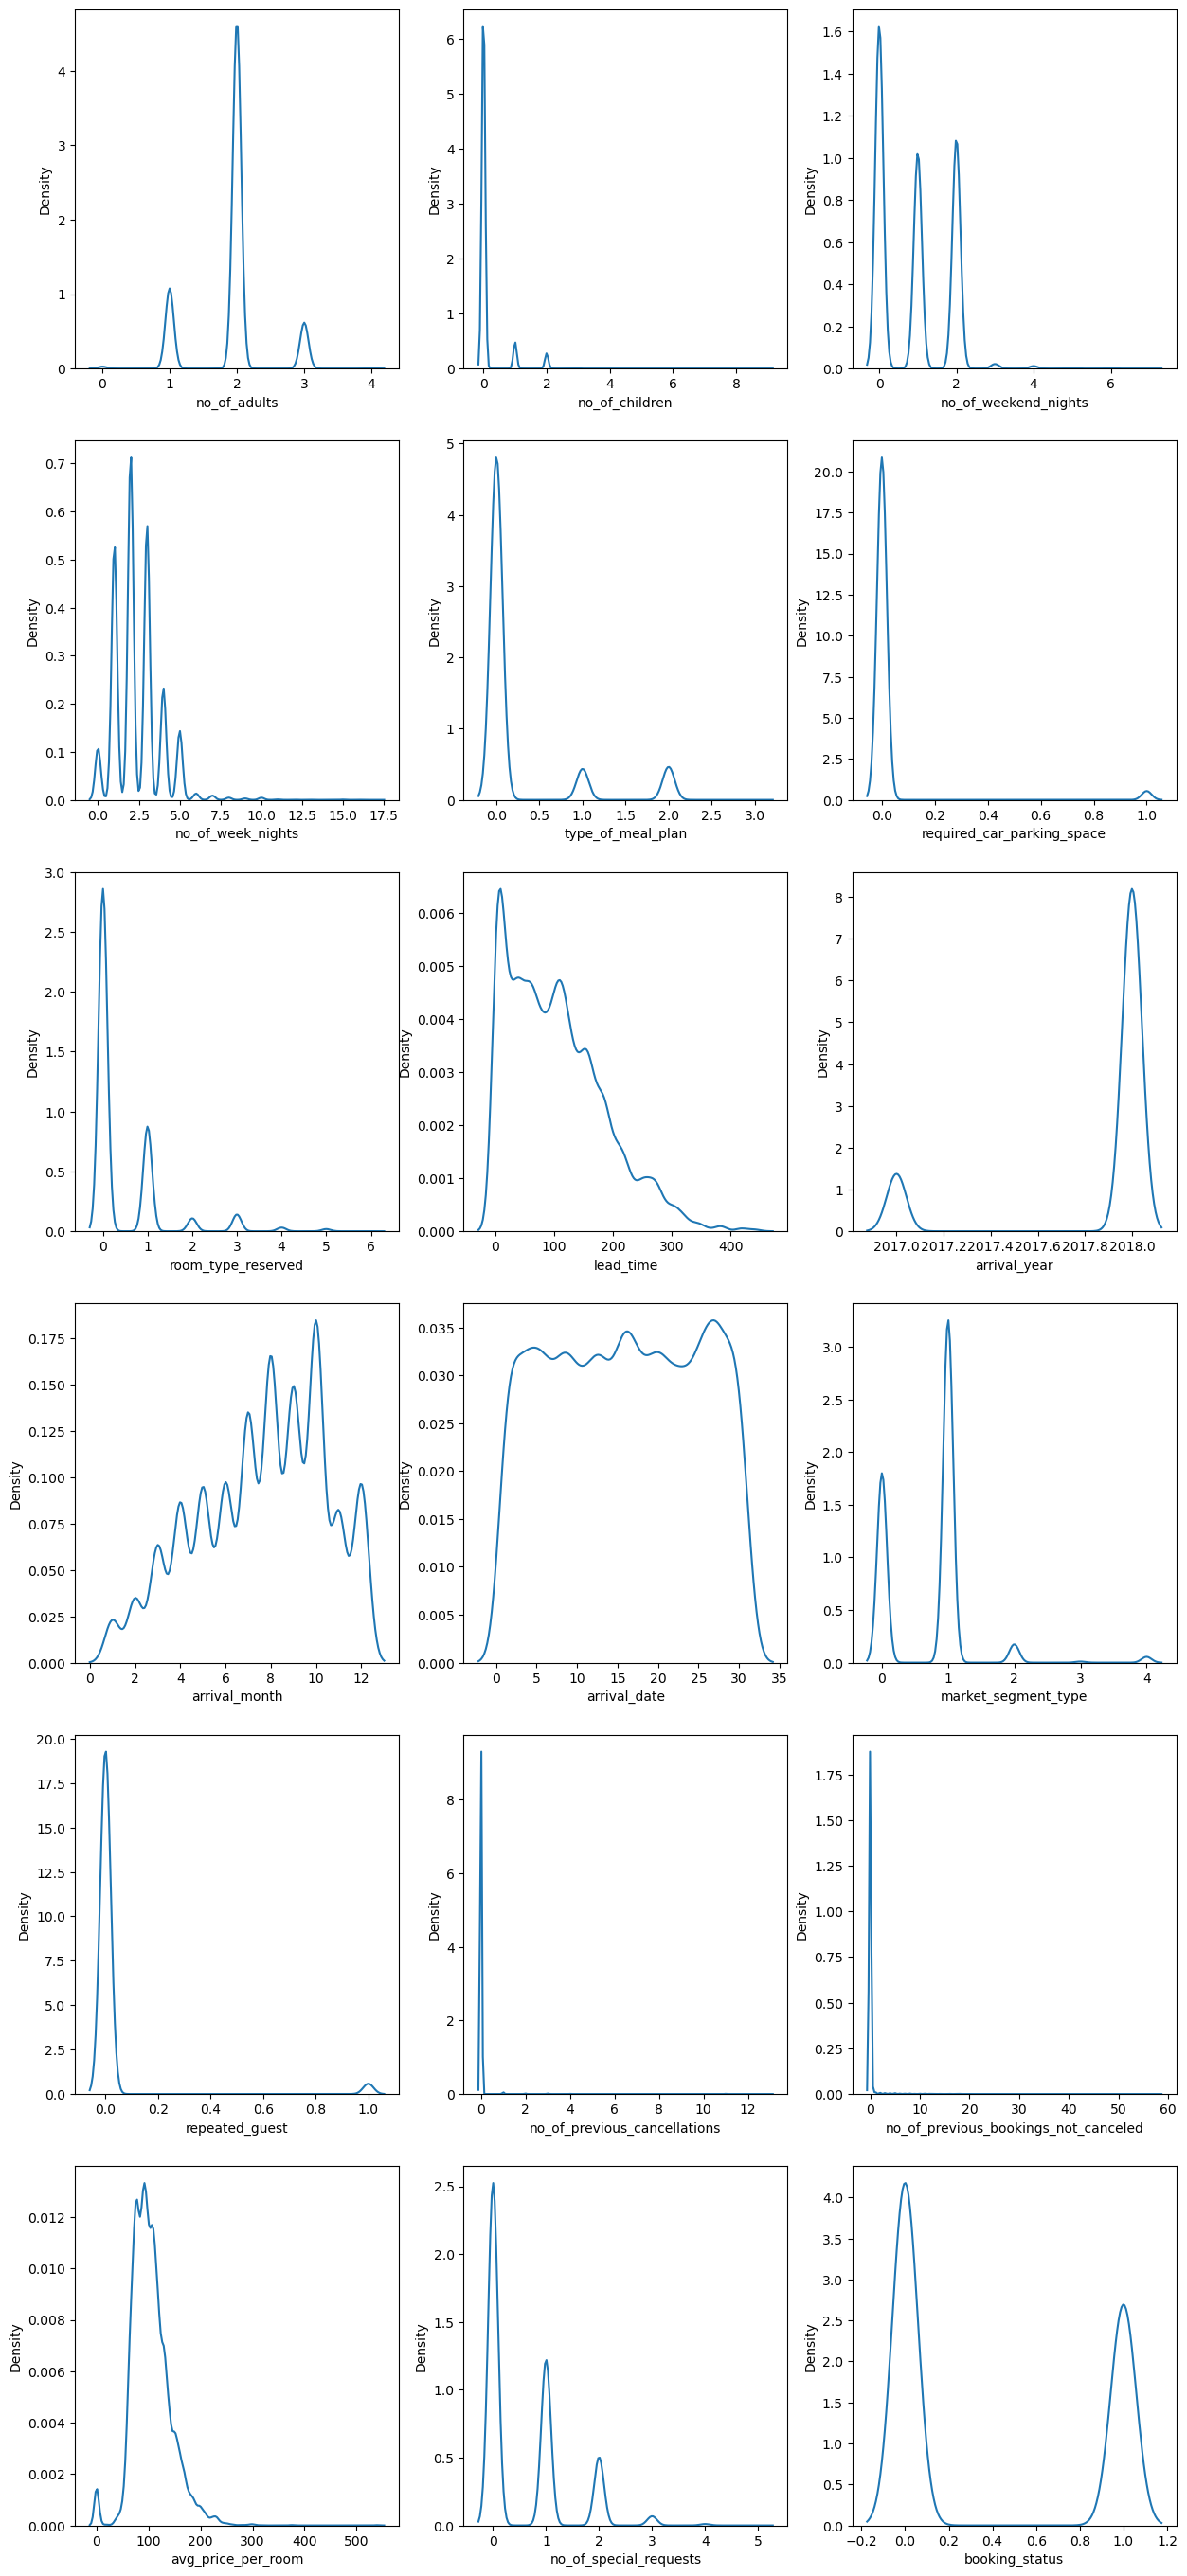

In [12]:
plt.figure(figsize=(15,70), facecolor='white')
plotnumber = 1

for i in num_features:
    if plotnumber<=75 :
        ax = plt.subplot(12,3,plotnumber)
        sns.kdeplot(train[i])
    plotnumber+=1
plt.show()

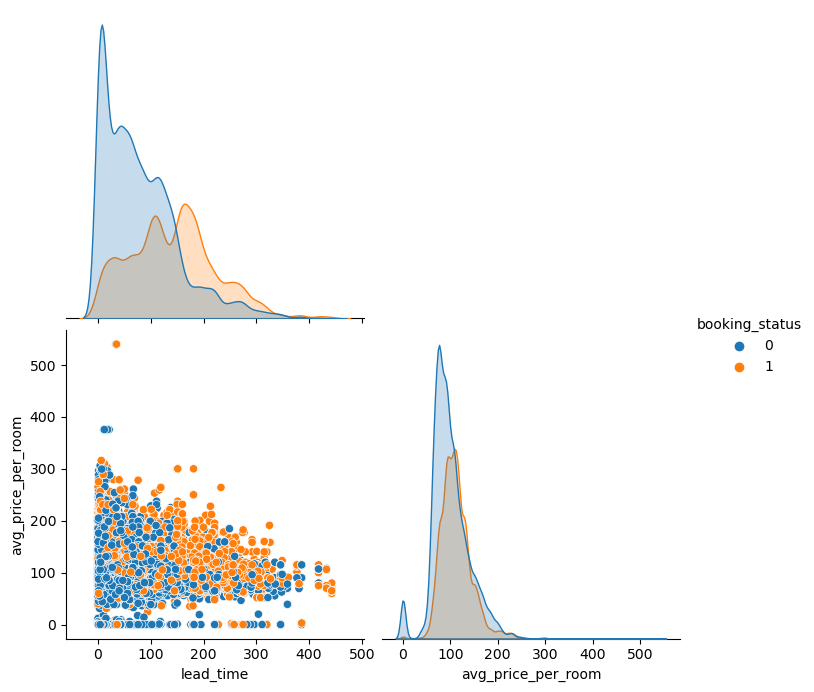

In [13]:
sns.pairplot(train[["lead_time", "avg_price_per_room", "booking_status"]], 
             corner=True,
             height=3.5, hue="booking_status");

In [14]:
def plot_countplot(data, x):
    # Create the countplot
    ax = sns.countplot(data=data, x=x)
    # Calculate and annotate the percentage of each category
    total = float(len(data))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height() + 10
        ax.text(x, y, percentage, ha="center")

    # Show the plot
    plt.show()

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

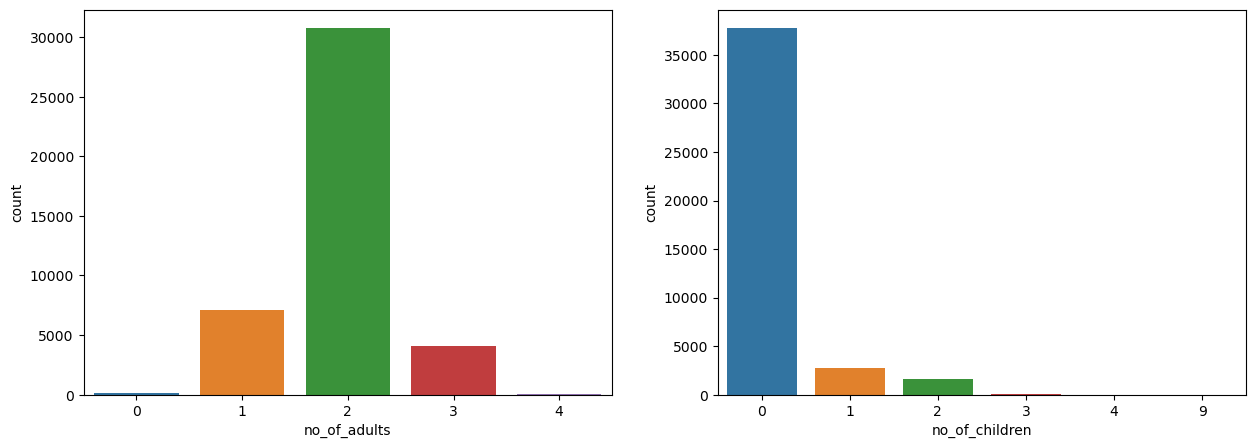

In [15]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=train, x="no_of_adults", ax=ax[0])
sns.countplot(data=train, x="no_of_children", ax=ax[1])

In [16]:
train['no_of_adults'].value_counts()

2    30771
1     7089
3     4061
0      167
4       12
Name: no_of_adults, dtype: int64

In [17]:
train['no_of_children'].value_counts()

0    37786
1     2729
2     1561
3       17
4        5
9        2
Name: no_of_children, dtype: int64

<AxesSubplot:xlabel='no_of_week_nights', ylabel='count'>

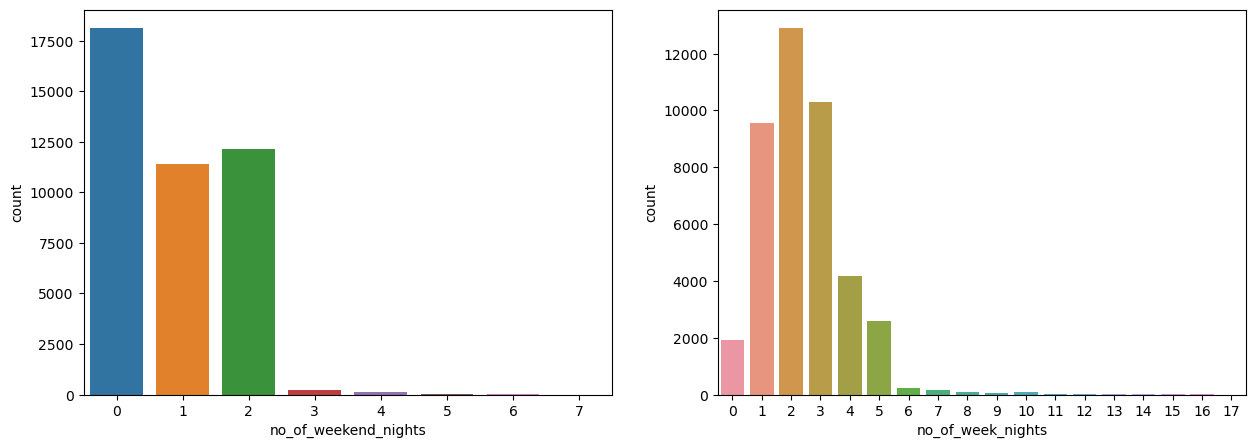

In [18]:
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=train, x="no_of_weekend_nights", ax=ax[0])
sns.countplot(data=train, x="no_of_week_nights", ax=ax[1])

In [19]:
train['no_of_weekend_nights'].value_counts()

0    18137
2    12143
1    11389
3      239
4      128
5       46
6       17
7        1
Name: no_of_weekend_nights, dtype: int64

In [20]:
train['no_of_week_nights'].value_counts()

2     12905
3     10286
1      9558
4      4175
5      2573
0      1937
6       237
7       160
8        84
10       82
9        53
11       16
15       11
12        9
13        5
16        4
14        3
17        2
Name: no_of_week_nights, dtype: int64

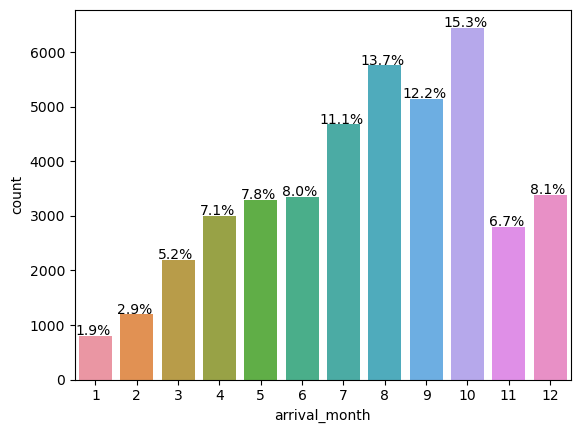

In [21]:
plot_countplot(data=train, x="arrival_month")

In [22]:
train['arrival_month'].value_counts()

10    6453
8     5763
9     5148
7     4681
12    3391
6     3356
5     3292
4     3006
11    2803
3     2201
2     1201
1      805
Name: arrival_month, dtype: int64

## Repeated season

In [23]:
# Create a function to map the month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Unknown'

# Apply the function to create a new column 'season'
train['season'] = train['arrival_month'].apply(lambda x: get_season(x))

In [24]:
train['season'].value_counts()

Fall      14404
Summer    13800
Spring     8499
Winter     5397
Name: season, dtype: int64

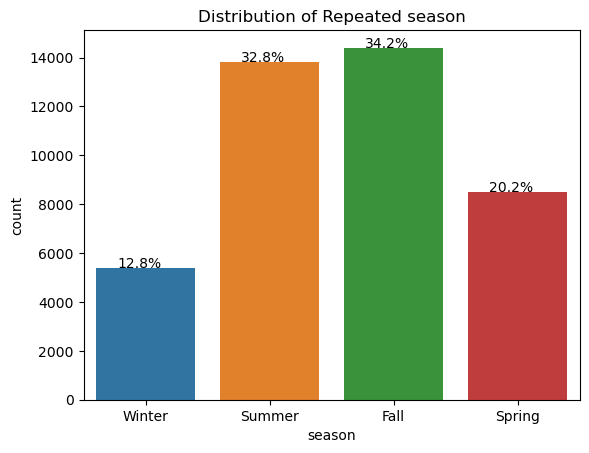

In [25]:
plt.title('Distribution of Repeated season')
plot_countplot(data=train, x="season")

## Arrival date according to the days of the week

In [26]:
import datetime

# Define the start date and create a function to convert the number of days to day name
start_date = datetime.datetime(1900, 1, 1)

def days_to_day_name(days):
    date = start_date + datetime.timedelta(days=int(days))
    return date.strftime("%A")

# Apply the function to create a new column 'arrival_day_name'
train['arrival_day_name'] = train['arrival_date'].apply(lambda x: days_to_day_name(x))

In [27]:
train['arrival_day_name'].value_counts()

Wednesday    7312
Tuesday      6882
Sunday       5975
Thursday     5884
Saturday     5499
Friday       5454
Monday       5094
Name: arrival_day_name, dtype: int64

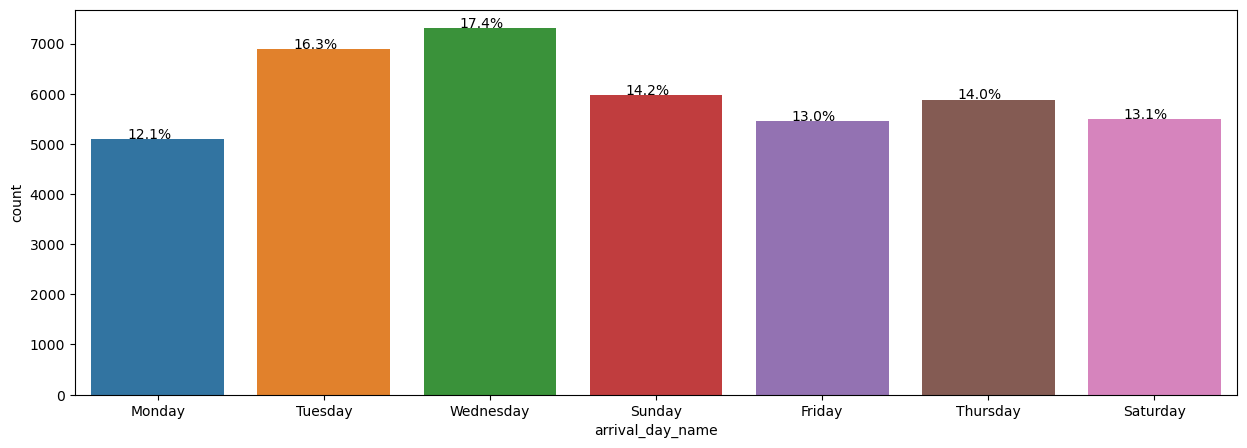

In [28]:
plt.subplots(figsize=(15,5))
plot_countplot(data=train, x="arrival_day_name")

In [29]:
# Create new date column 
# train['arrival_date_full'] = train['arrival_year'].astype(str) + '-' + train['arrival_month'].astype(str) + '-' + train['arrival_date'].astype(str)

# sns.lineplot(data=train, x="arrival_date_full",y='avg_price_per_room')
# sns.lineplot(data=agg)


## Average  Price by Booking Status and Arrival Month

In [30]:
agg_0 = train.loc[train['booking_status']==0].groupby(['arrival_month'])['avg_price_per_room'].mean()
agg_1 = train.loc[train['booking_status']==1].groupby(['arrival_month'])['avg_price_per_room'].mean()
print('Not cancelled',agg_0)

Not cancelled arrival_month
1      71.197082
2      85.533824
3      87.884122
4      97.815109
5     111.250992
6     109.003188
7     106.448445
8     111.150985
9     113.660902
10     98.474295
11     86.822499
12     85.889961
Name: avg_price_per_room, dtype: float64


In [31]:
print('cancelle',agg_1)

cancelle arrival_month
1      78.543793
2      83.580852
3     107.631987
4     106.557939
5     118.347861
6     115.897328
7     110.817719
8     116.355110
9     122.277993
10    108.536709
11     97.291693
12     96.994692
Name: avg_price_per_room, dtype: float64


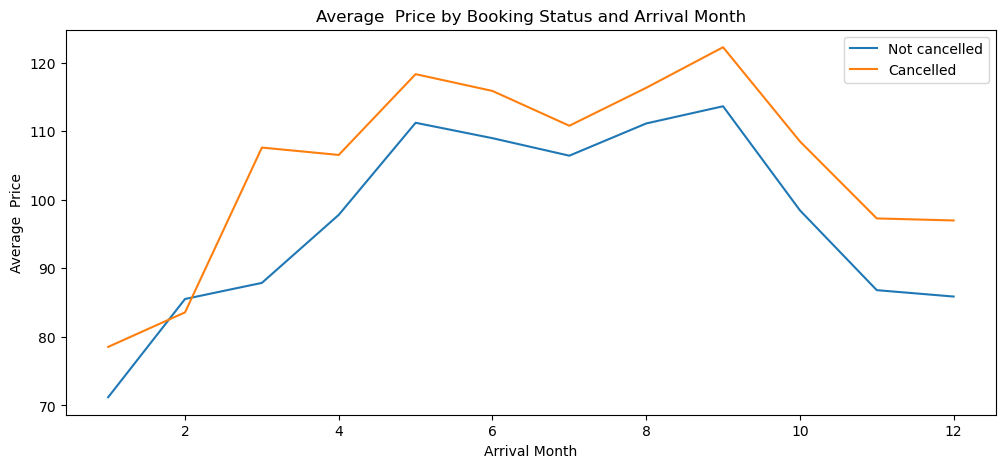

In [32]:
plt.figure(figsize=(12,5))

plt.plot(agg_0.index, agg_0.values, label='Not cancelled')
plt.plot(agg_1.index, agg_1.values, label='Cancelled')

plt.xlabel('Arrival Month')
plt.ylabel('Average  Price')

plt.title('Average  Price by Booking Status and Arrival Month')
plt.legend()

plt.show()


## Average  Price by Booking Status and Arrival Date

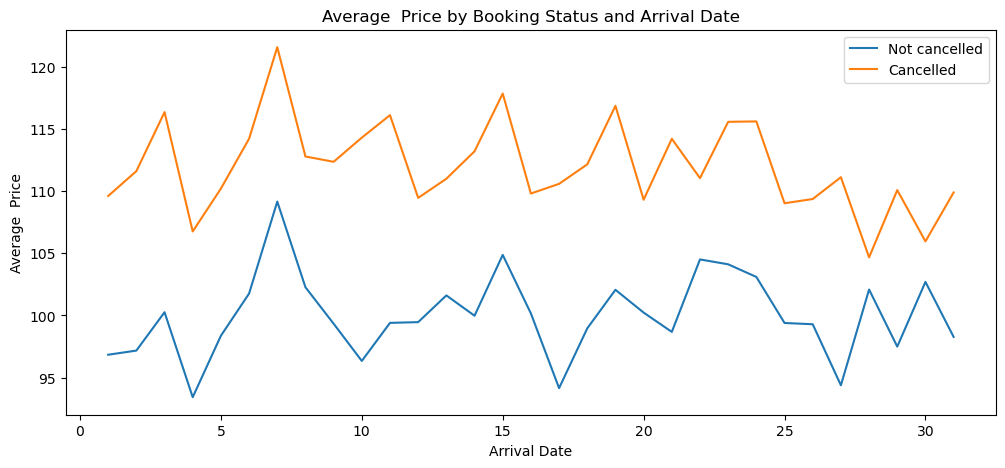

In [33]:
agg_0 = train.loc[train['booking_status']==0].groupby(['arrival_date'])['avg_price_per_room'].mean()
agg_1 = train.loc[train['booking_status']==1].groupby(['arrival_date'])['avg_price_per_room'].mean()

plt.figure(figsize=(12,5))

plt.plot(agg_0.index, agg_0.values, label='Not cancelled')
plt.plot(agg_1.index, agg_1.values, label='Cancelled')

plt.xlabel('Arrival Date')
plt.ylabel('Average  Price')

plt.title('Average  Price by Booking Status and Arrival Date')
plt.legend()

plt.show()


## Arrival Year

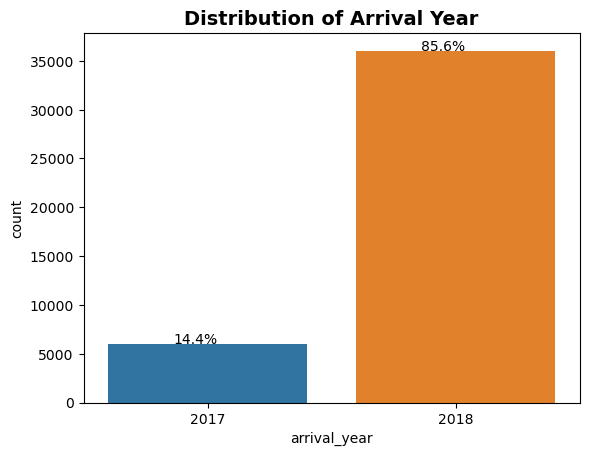

In [34]:
plt.title('Distribution of Arrival Year', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="arrival_year")

In [35]:
train['arrival_year'].value_counts()

2018    36050
2017     6050
Name: arrival_year, dtype: int64

## Repeated status  

In [36]:
# Define a dictionary to map the values
name_type = {0: "not repeated guest", 1: "repeated guest"}
train['repeated_status'] = train['repeated_guest'].map(name_type)
train['repeated_status'].value_counts()

not repeated guest    40871
repeated guest         1229
Name: repeated_status, dtype: int64

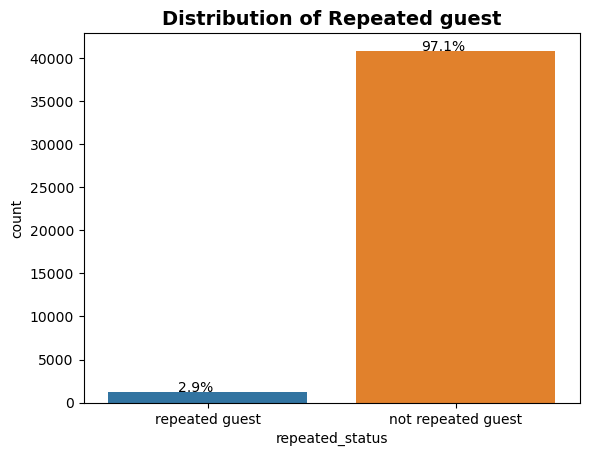

In [37]:
plt.title('Distribution of Repeated guest', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="repeated_status")

## Parking Space

In [38]:
name_type = {0: "not require car parking space", 1: "require car parking space"}
train['required_car_parking_status'] = train['required_car_parking_space'].map(name_type)
train['required_car_parking_status'].value_counts()

not require car parking space    41037
require car parking space         1063
Name: required_car_parking_status, dtype: int64

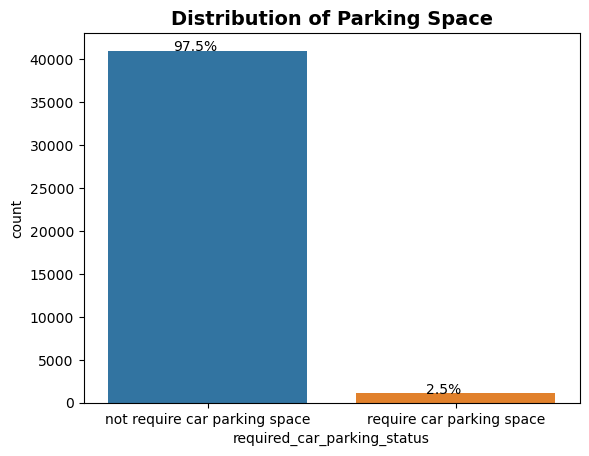

In [39]:
plt.title('Distribution of Parking Space', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="required_car_parking_status")

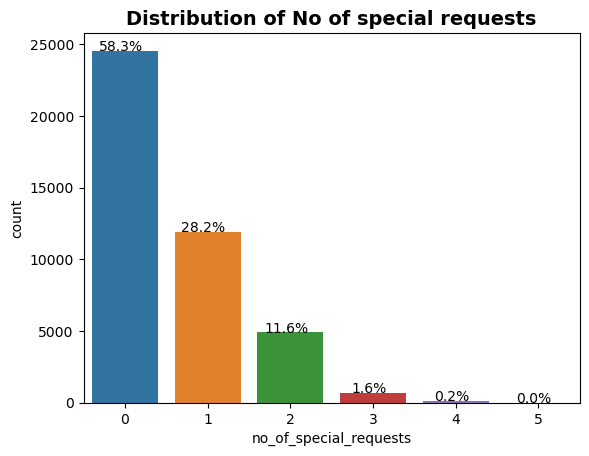

In [40]:
plt.title('Distribution of No of special requests', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="no_of_special_requests")


## Cancelled status

In [41]:
name_type = {0: "not cancelled", 1: "cancelled"}
train['booking_cancelled_status'] = train['booking_status'].map(name_type)
train['booking_cancelled_status'].value_counts()

not cancelled    25596
cancelled        16504
Name: booking_cancelled_status, dtype: int64

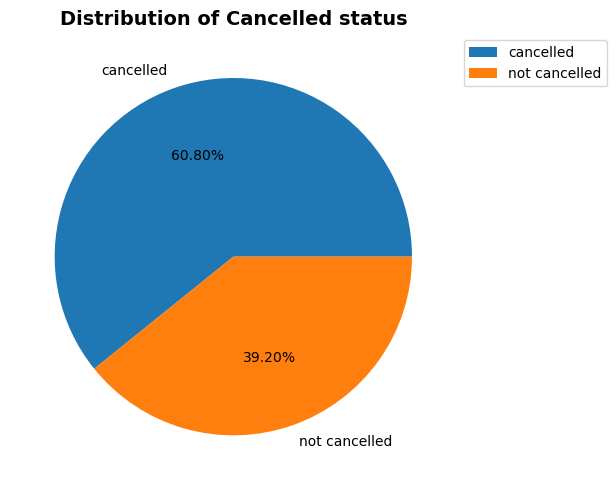

In [42]:
plt.figure(figsize = (15,5))
x = train['booking_cancelled_status'].value_counts()
labels = 'cancelled','not cancelled'
plt.pie(x = x,  labels = labels, autopct = '%.2f%%')
plt.title('Distribution of Cancelled status', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

## Market Segment Type

In [43]:
name_type = {0: 'market_segment_1 ', 1: 'market_segment_2', 2: 'market_segment_3', 3: 'market_segment_4', 4:'market_segment_5'}
train['market_segment_type_text'] = train['market_segment_type'].map(name_type)
train['market_segment_type_text'].value_counts()

market_segment_2     25885
market_segment_1     14306
market_segment_3      1384
market_segment_5       442
market_segment_4        83
Name: market_segment_type_text, dtype: int64

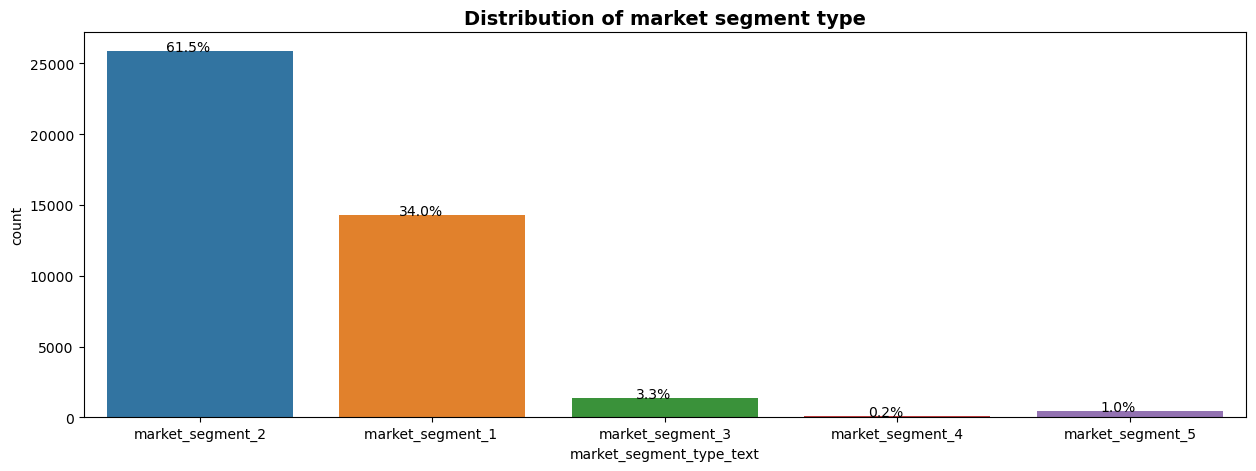

In [44]:
plt.subplots(figsize=(15,5))
plt.title('Distribution of market segment type', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="market_segment_type_text")


## Type of Meal Plan

In [45]:
name_type = {0: 'No meal plan', 1: 'Breakfast', 2: 'Half board', 3: 'Full board'}
train['type_of_meal_plan_text'] = train['type_of_meal_plan'].map(name_type)
train['type_of_meal_plan_text'].value_counts()

No meal plan    35463
Half board       3421
Breakfast        3210
Full board          6
Name: type_of_meal_plan_text, dtype: int64

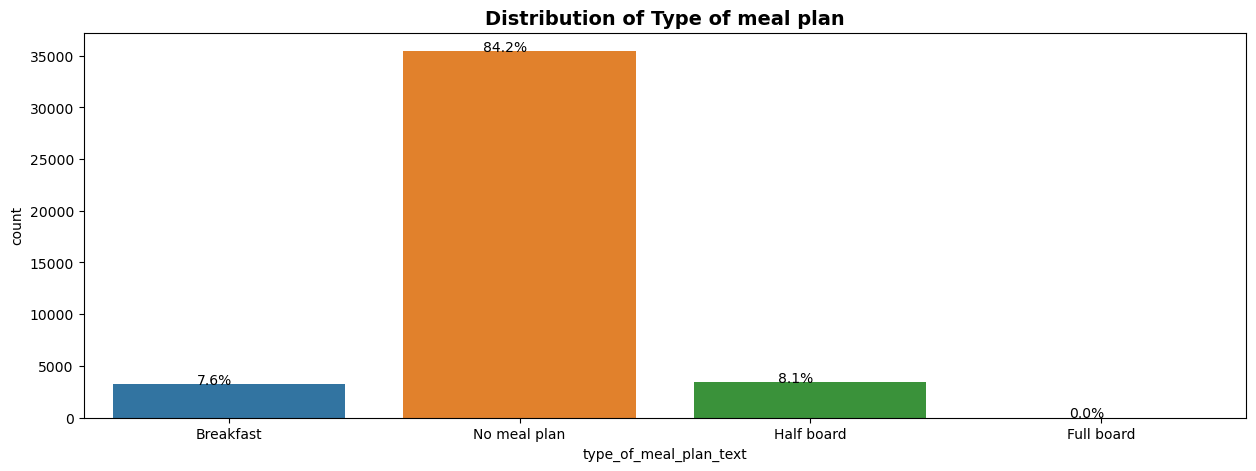

In [46]:
plt.subplots(figsize=(15,5))
plt.title('Distribution of Type of meal plan', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="type_of_meal_plan_text")


## Room Type Reserved

In [47]:
name_type = {0: 'room_type_0', 1: 'room_type_1', 2: 'room_type_2', 3: 'room_type_3', 4: 'room_type_4', 5:'room_type_5', 6:'room_type_6'}
train['room_type_reserved_text'] = train['room_type_reserved'].map(name_type)
train['room_type_reserved_text'].value_counts()

room_type_0    29853
room_type_1     9135
room_type_3     1465
room_type_2     1131
room_type_4      320
room_type_5      190
room_type_6        6
Name: room_type_reserved_text, dtype: int64

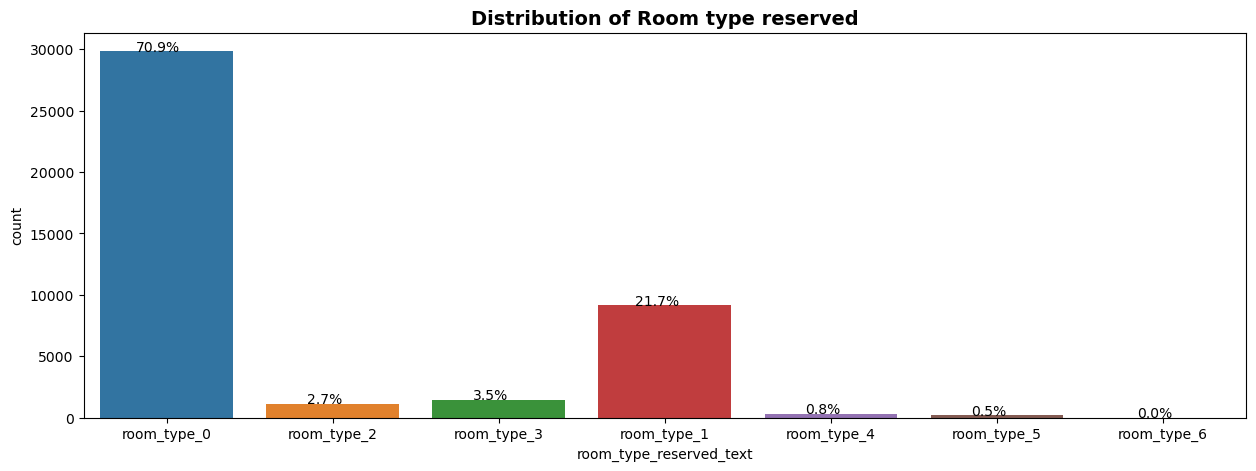

In [48]:
plt.subplots(figsize=(15,5))
plt.title('Distribution of Room type reserved', fontsize = 14, fontweight = 'bold')
plot_countplot(data=train, x="room_type_reserved_text")


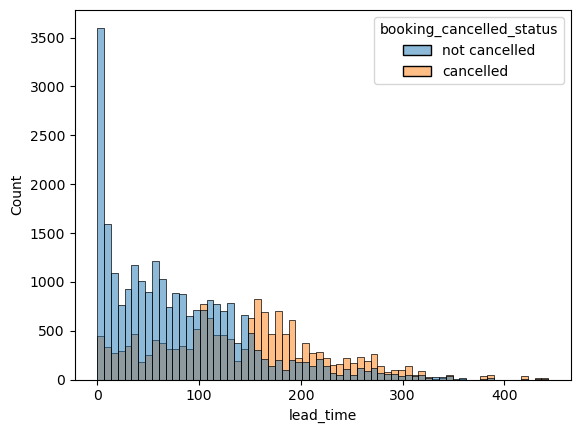

In [49]:
sns.histplot(data=train, x="lead_time", hue="booking_cancelled_status");


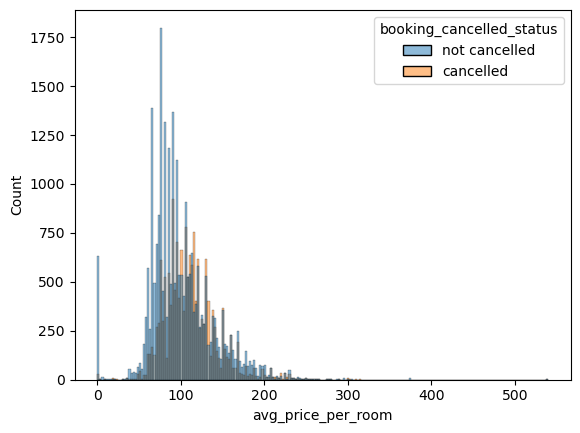

In [50]:
sns.histplot(data=train, x="avg_price_per_room", hue="booking_cancelled_status");


In [51]:
cat_features = np.array([i for i in train.columns.tolist() if train[i].dtype == 'object'])
num_features = np.array([i for i in train.columns.tolist() if train[i].dtype != 'object'])

print("Number features column =" , len(num_features))
print("Categorial features column =" , len(cat_features))

Number features column = 18
Categorial features column = 8


In [52]:
def stacked_barplot(df, predictor, target):

    # Get the number of unique categories in the predictor variable
    count = len(df[predictor].unique())
    
    # Create a crosstab of the predictor and target variables
    crosstab = pd.crosstab(df[predictor], df[target])
    
    # Sort the crosstab by the count of the most common target value
    sorter = crosstab.sum(axis=1).sort_values(ascending=False).index
    crosstab = crosstab.loc[sorter]
    print(crosstab)
    print("-" * 120)
    
    # Plot the stacked bar chart
    ax = crosstab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    
    # Add a legend to the plot
    ax.legend(loc="lower left", frameon=False, bbox_to_anchor=(1, 1))
    
    # Set the title and axis labels
    ax.set_title("Distribution of {} vs. {}".format(predictor, target))
    ax.set_xlabel(predictor)
    
    # Loop over the bars to add value labels
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=8, padding=4)

    plt.show()


booking_cancelled_status  cancelled  not cancelled
season                                            
Fall                           5864           8540
Summer                         6670           7130
Spring                         3043           5456
Winter                          927           4470
------------------------------------------------------------------------------------------------------------------------


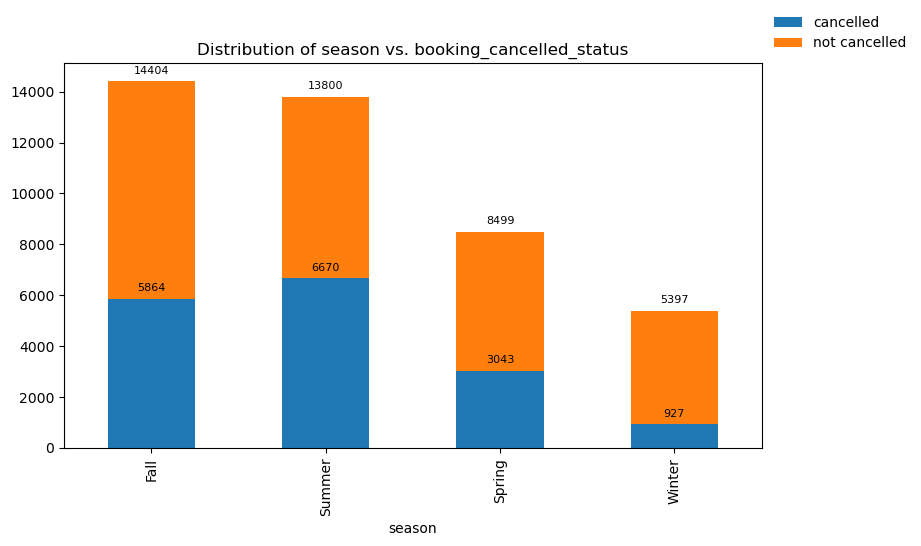

In [53]:
stacked_barplot(train, "season", "booking_cancelled_status")


booking_cancelled_status  cancelled  not cancelled
arrival_month                                     
10                             2923           3530
8                              3041           2722
9                              2167           2981
7                              2218           2463
12                              552           2839
6                              1411           1945
5                              1337           1955
4                              1082           1924
11                              774           2029
3                               624           1577
2                               317            884
1                                58            747
------------------------------------------------------------------------------------------------------------------------


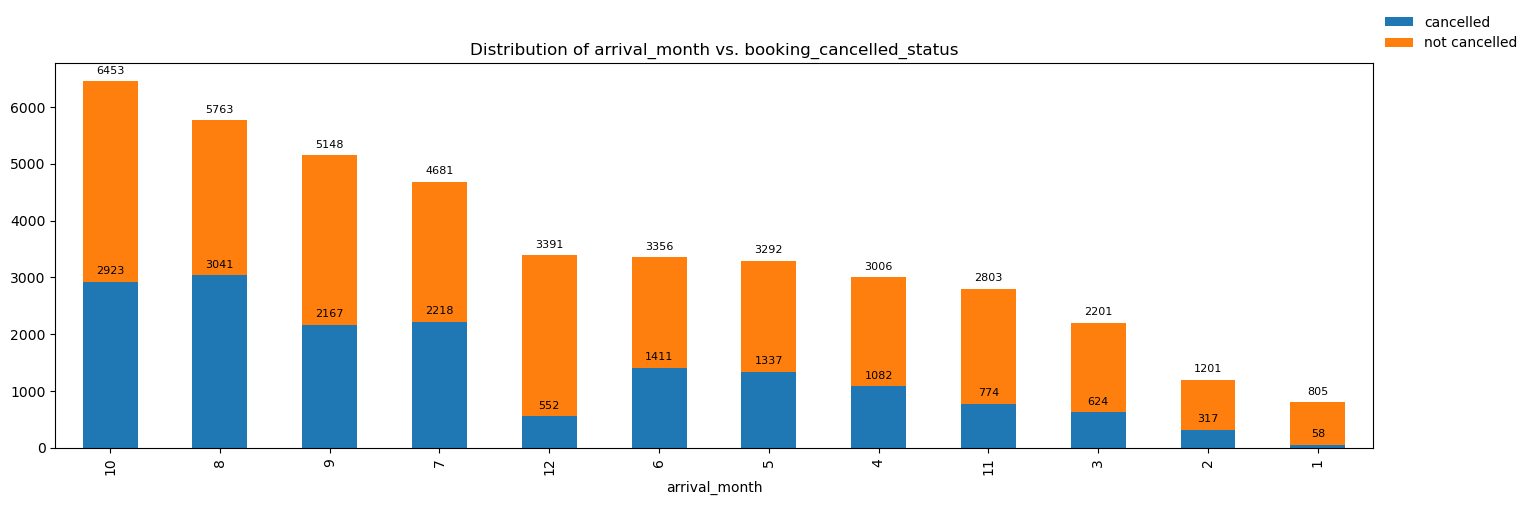

In [54]:
stacked_barplot(train, "arrival_month", "booking_cancelled_status")

booking_cancelled_status  cancelled  not cancelled
no_of_week_nights                                 
2                              4884           8021
3                              3954           6332
1                              3465           6093
4                              1826           2349
5                              1249           1324
0                               776           1161
6                               132            105
7                                84             76
8                                51             33
10                               41             41
9                                24             29
11                                6             10
15                                3              8
12                                3              6
13                                2              3
16                                3              1
14                                1              2
17                             

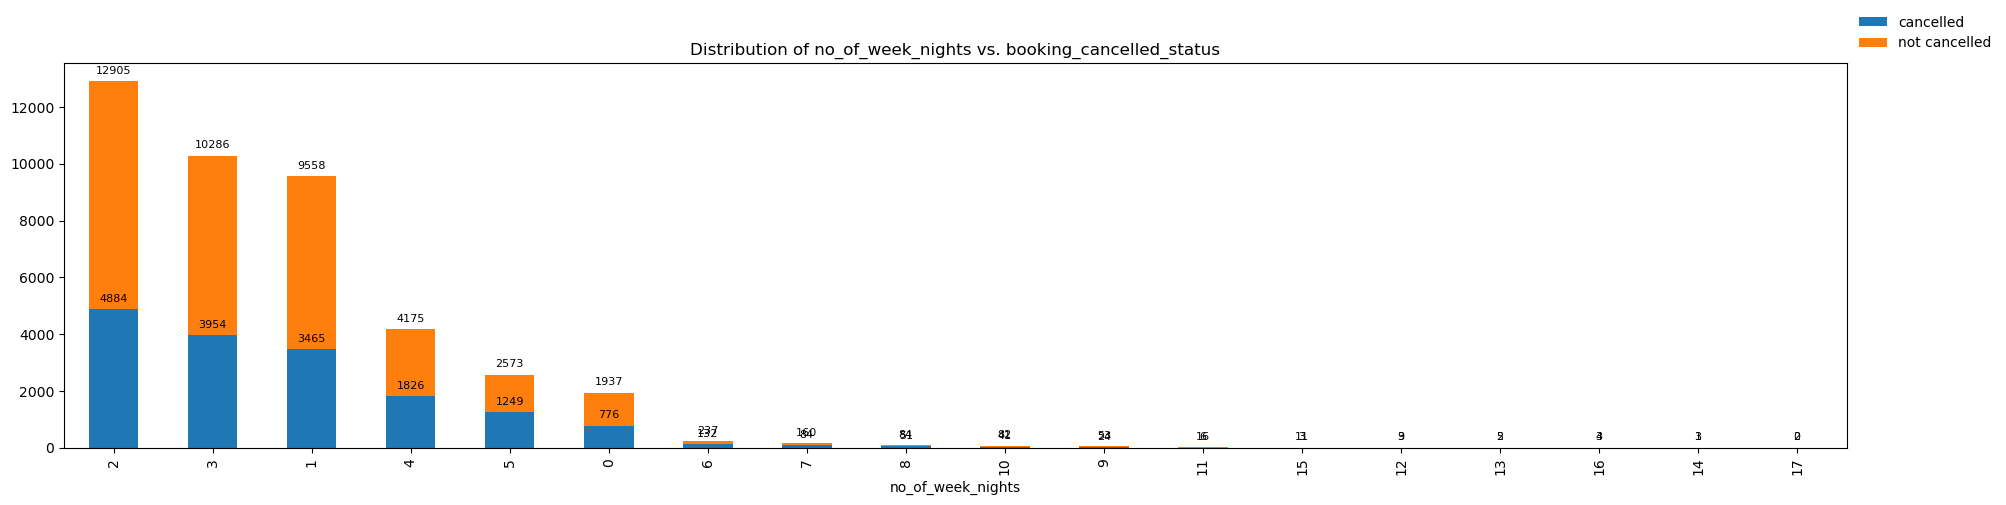

In [55]:
stacked_barplot(train, "no_of_week_nights","booking_cancelled_status")

booking_cancelled_status  cancelled  not cancelled
no_of_weekend_nights                              
0                              6655          11482
2                              5000           7143
1                              4637           6752
3                               113            126
4                                73             55
5                                18             28
6                                 8              9
7                                 0              1
------------------------------------------------------------------------------------------------------------------------


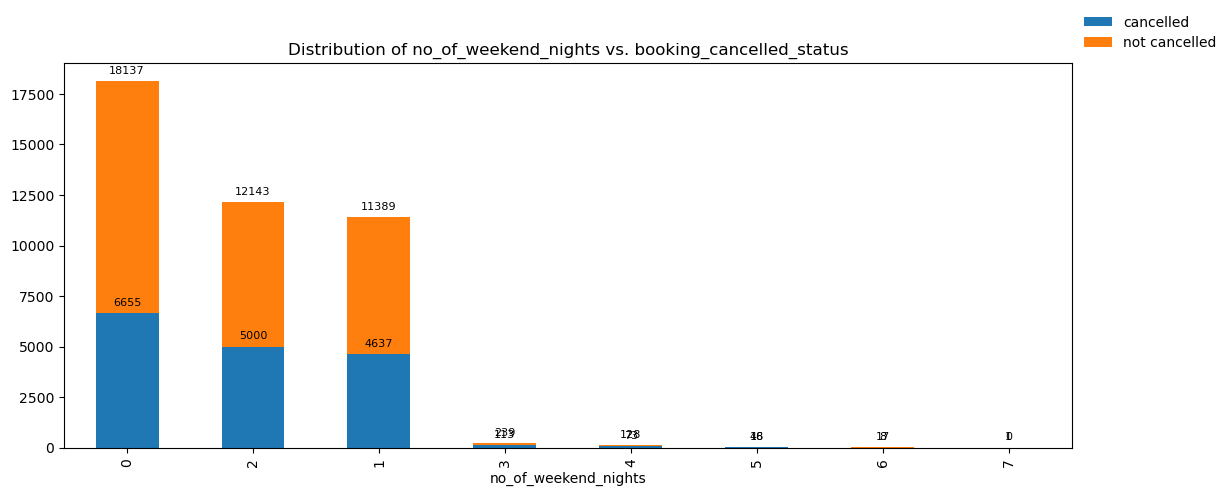

In [56]:
stacked_barplot(train, "no_of_weekend_nights","booking_cancelled_status")

booking_cancelled_status  cancelled  not cancelled
market_segment_type_text                          
market_segment_2              13084          12801
market_segment_1               3233          11073
market_segment_3                162           1222
market_segment_5                  7            435
market_segment_4                 18             65
------------------------------------------------------------------------------------------------------------------------


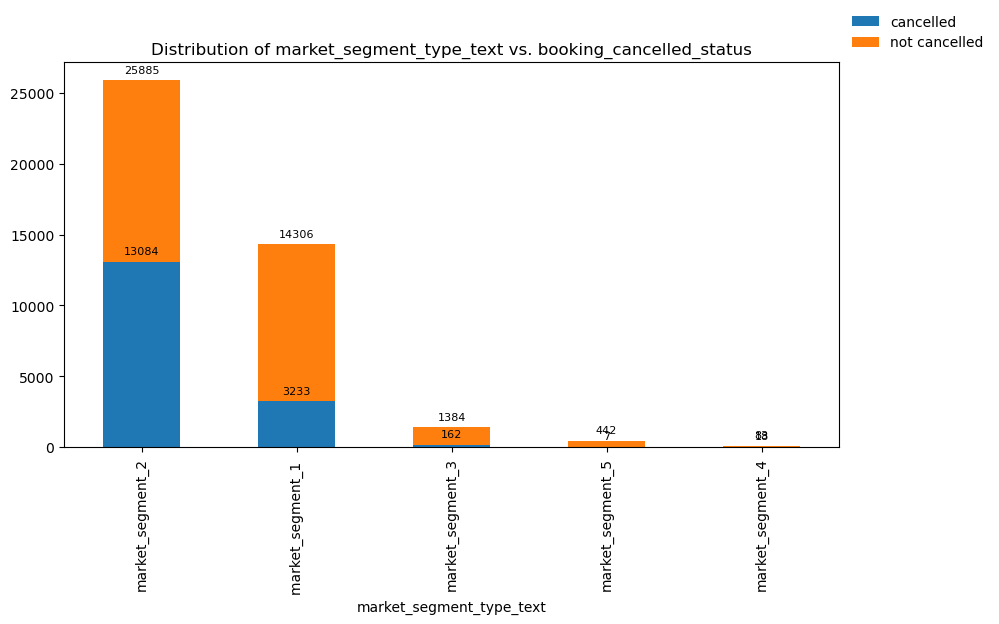

In [57]:
stacked_barplot(train, "market_segment_type_text", "booking_cancelled_status")


booking_cancelled_status  cancelled  not cancelled
room_type_reserved_text                           
room_type_0                   11743          18110
room_type_1                    3690           5445
room_type_3                     604            861
room_type_2                     357            774
room_type_4                      83            237
room_type_5                      26            164
room_type_6                       1              5
------------------------------------------------------------------------------------------------------------------------


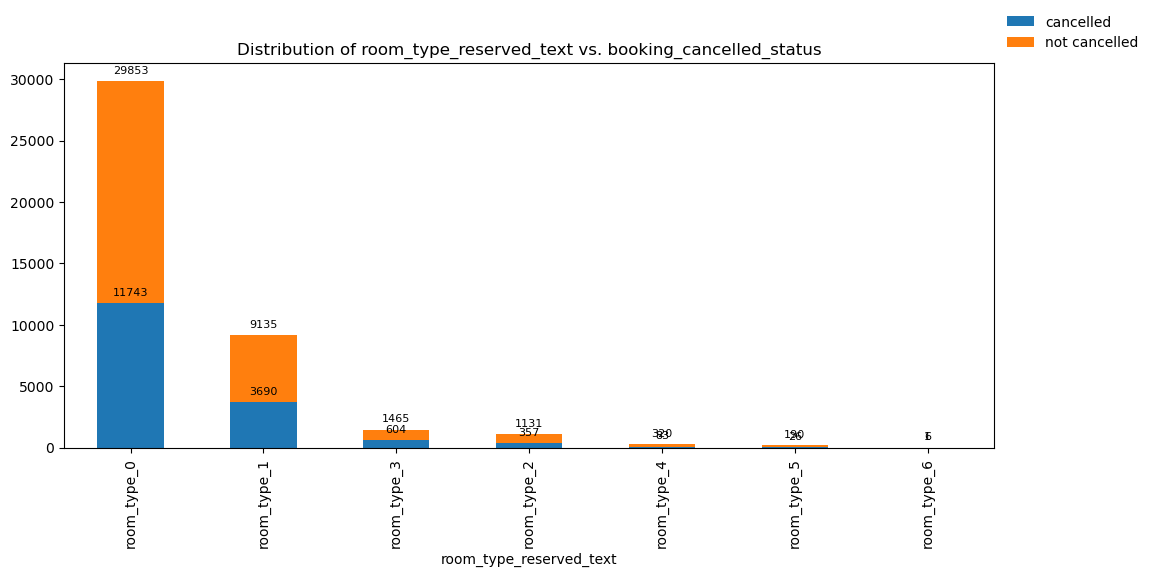

In [58]:
stacked_barplot(train, "room_type_reserved_text", "booking_cancelled_status")


booking_cancelled_status       cancelled  not cancelled
required_car_parking_status                            
not require car parking space      16388          24649
require car parking space            116            947
------------------------------------------------------------------------------------------------------------------------


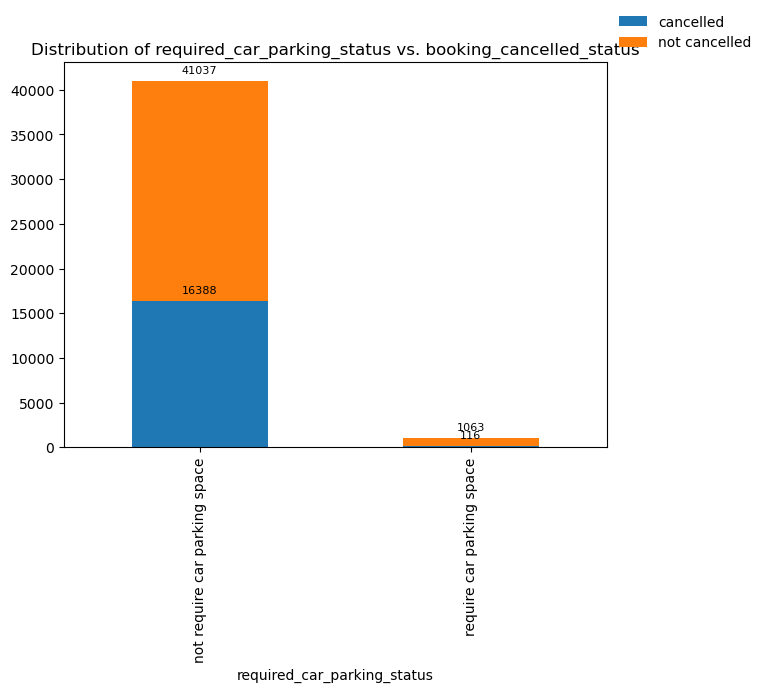

In [59]:

stacked_barplot(train, "required_car_parking_status", "booking_cancelled_status")

booking_cancelled_status  cancelled  not cancelled
repeated_status                                   
not repeated guest            16493          24378
repeated guest                   11           1218
------------------------------------------------------------------------------------------------------------------------


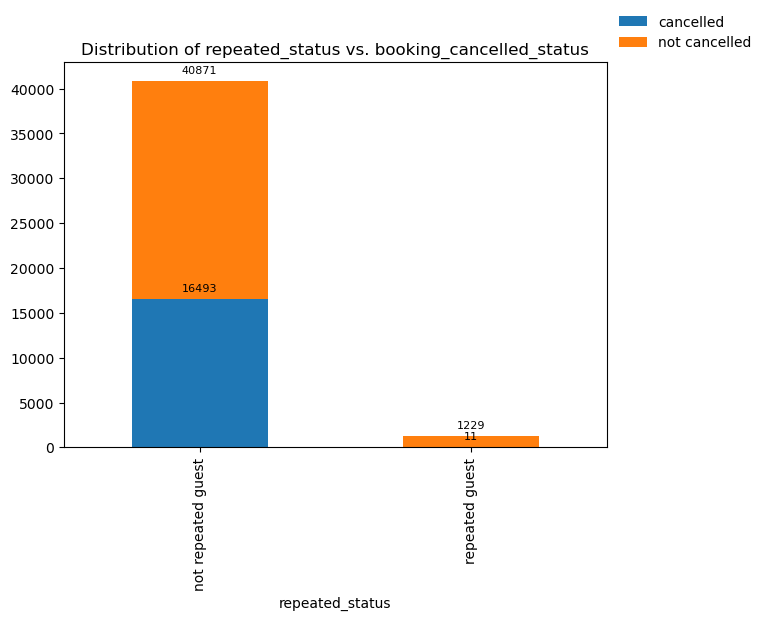

In [60]:

stacked_barplot(train, "repeated_status", "booking_cancelled_status")

booking_cancelled_status  cancelled  not cancelled
no_of_special_requests                            
0                             11710          12844
1                              3666           8219
2                              1123           3777
3                                 5            655
4                                 0            100
5                                 0              1
------------------------------------------------------------------------------------------------------------------------


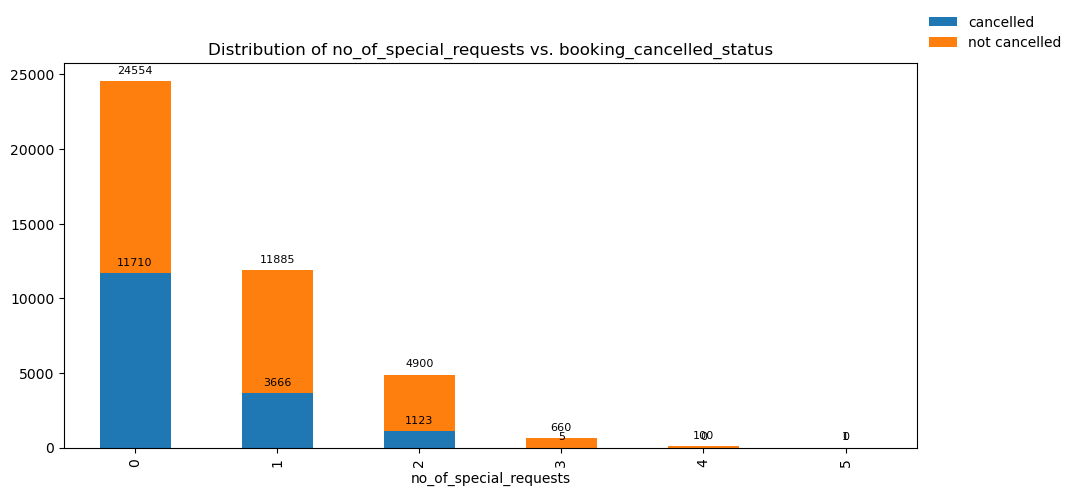

In [61]:
# no_of_previous_bookings_not_canceled   -0.080166
stacked_barplot(train, "no_of_special_requests","booking_cancelled_status")

booking_cancelled_status  cancelled  not cancelled
repeated_status                                   
not repeated guest            16493          24378
repeated guest                   11           1218
------------------------------------------------------------------------------------------------------------------------


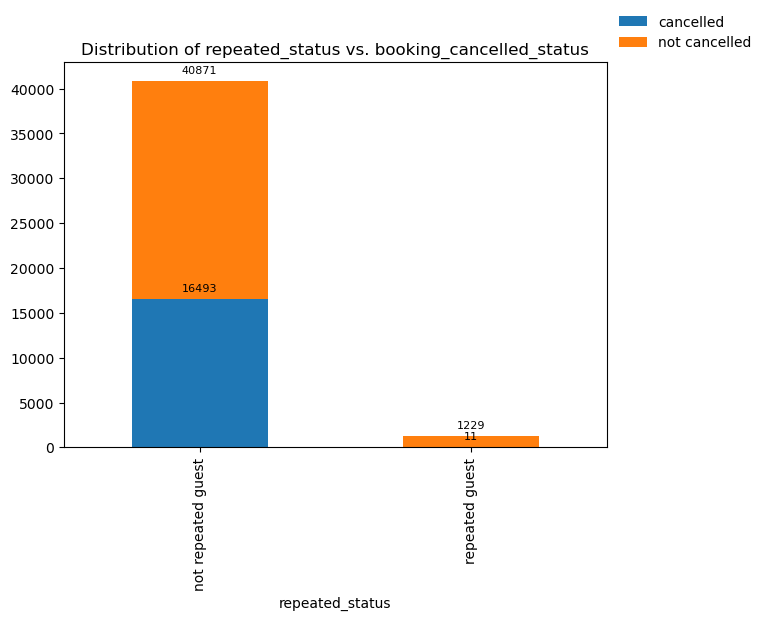

In [62]:
stacked_barplot(train, "repeated_status","booking_cancelled_status")

In [63]:
# for x in cat_features:
#     y = pd.crosstab(train[x], train['booking_cancelled_status'])
#     y.div(y.sum(1).astype(float), axis=0)
#     y.plot(kind='bar', stacked=True)
#     plt.title("Distribution of {} vs Booking Status".format(x))
#     plt.xticks(rotation=55)

In [64]:
# num_cols = ['no_of_previous_cancellations', 
#             'no_of_previous_bookings_not_canceled', 
#             'no_of_special_requests','arrival_year','arrival_month']

# for x in num_cols:
#     y = pd.crosstab(train[x], train['booking_cancelled_status'])
#     y.div(y.sum(1).astype(float), axis=0)
#     y.plot(kind='bar', stacked=True)
#     plt.title("Distribution of {} vs Booking Status".format(x))
#     plt.xticks(rotation=55)

# Feature Engineering

In [65]:
train['total_nights'] = train['no_of_weekend_nights'] + train['no_of_week_nights']


In [66]:
train['total_cost'] = train['total_nights'] * train['avg_price_per_room']
train['total_bookings'] = train['no_of_previous_cancellations'] + train['no_of_previous_bookings_not_canceled']
train['total_families'] = train['no_of_adults'] + train['no_of_children']
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_status,required_car_parking_status,booking_cancelled_status,market_segment_type_text,type_of_meal_plan_text,room_type_reserved_text,total_nights,total_cost,total_bookings,total_families
0,2,0,0,2,1,0,0,9,2018,1,...,repeated guest,not require car parking space,not cancelled,market_segment_2,Breakfast,room_type_0,2,135.00,11,2
1,2,0,1,2,0,0,0,117,2018,7,...,not repeated guest,not require car parking space,not cancelled,market_segment_1,No meal plan,room_type_0,3,216.75,0,2
2,2,0,0,1,0,0,0,315,2018,12,...,not repeated guest,not require car parking space,not cancelled,market_segment_1,No meal plan,room_type_0,1,52.00,0,2
3,1,0,0,2,1,0,0,32,2018,12,...,not repeated guest,not require car parking space,not cancelled,market_segment_2,Breakfast,room_type_0,2,112.00,0,1
4,2,0,1,0,0,0,0,258,2018,10,...,not repeated guest,not require car parking space,cancelled,market_segment_1,No meal plan,room_type_0,1,100.00,0,2


In [67]:
corr = train.corr()
corr.sort_values(['booking_status'], ascending=False, inplace=True)
corr.booking_status

booking_status                          1.000000
lead_time                               0.374865
arrival_year                            0.178326
avg_price_per_room                      0.157484
total_cost                              0.141306
market_segment_type                     0.112648
no_of_adults                            0.079760
total_nights                            0.067583
total_families                          0.064336
no_of_week_nights                       0.058506
type_of_meal_plan                       0.045980
no_of_weekend_nights                    0.044279
arrival_month                           0.007639
no_of_children                          0.004260
arrival_date                            0.003124
room_type_reserved                     -0.023087
no_of_previous_cancellations           -0.045599
no_of_previous_bookings_not_canceled   -0.080166
total_bookings                         -0.081142
required_car_parking_space             -0.093262
repeated_guest      

In [68]:
# train_corr = train.select_dtypes(include=[np.number])

# corr = train.corr()
# plt.subplots(figsize=(17,9))
# sns.heatmap(corr, annot=True, vmin=-1, vmax=1)

# Remove outliers

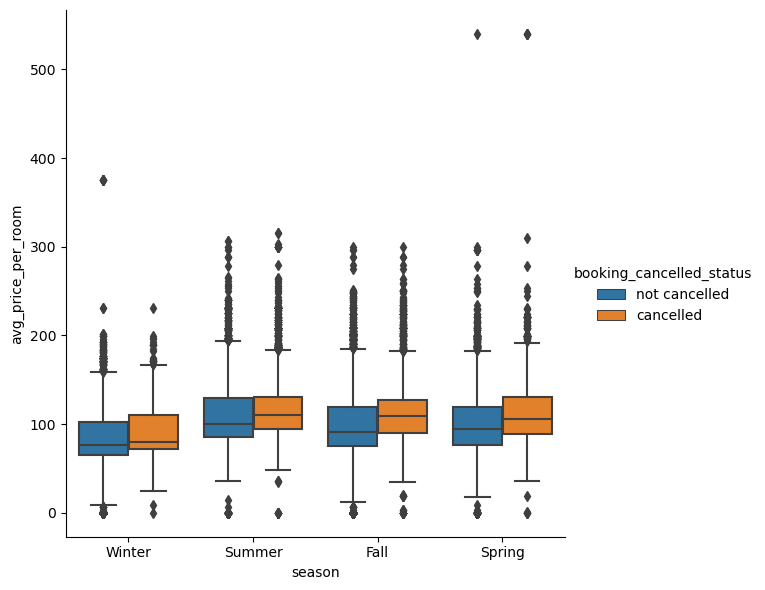

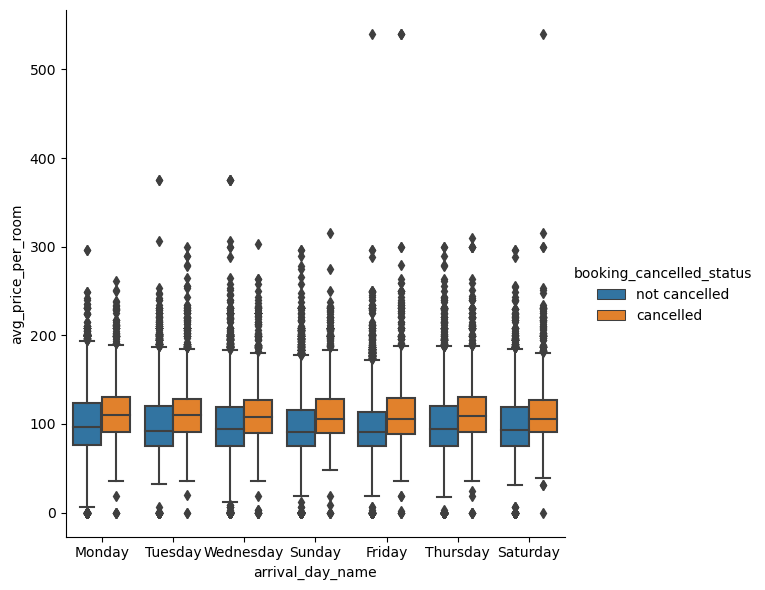

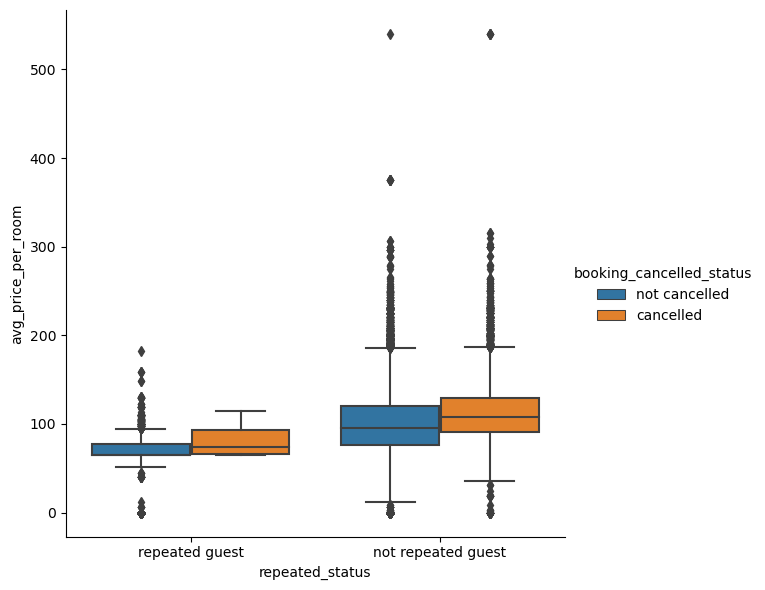

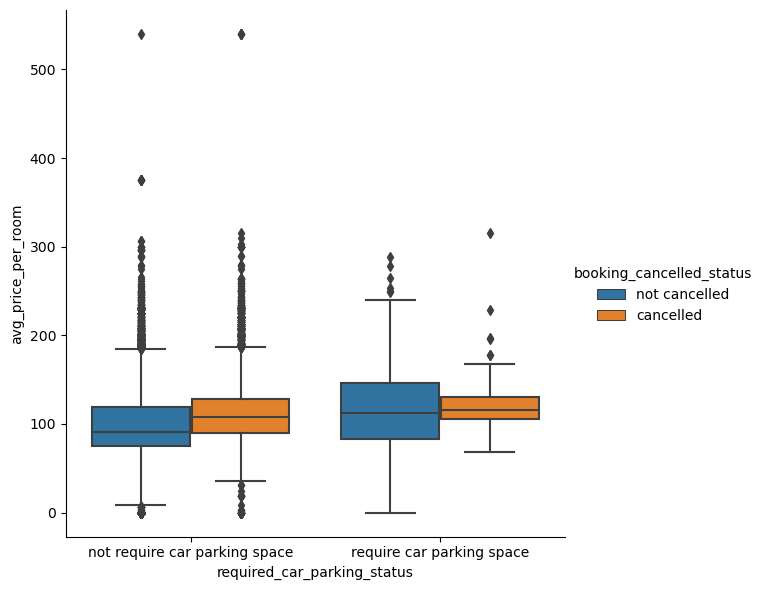

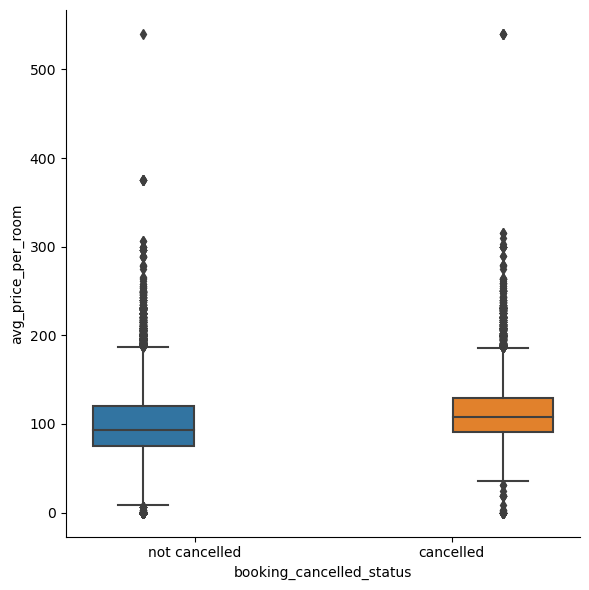

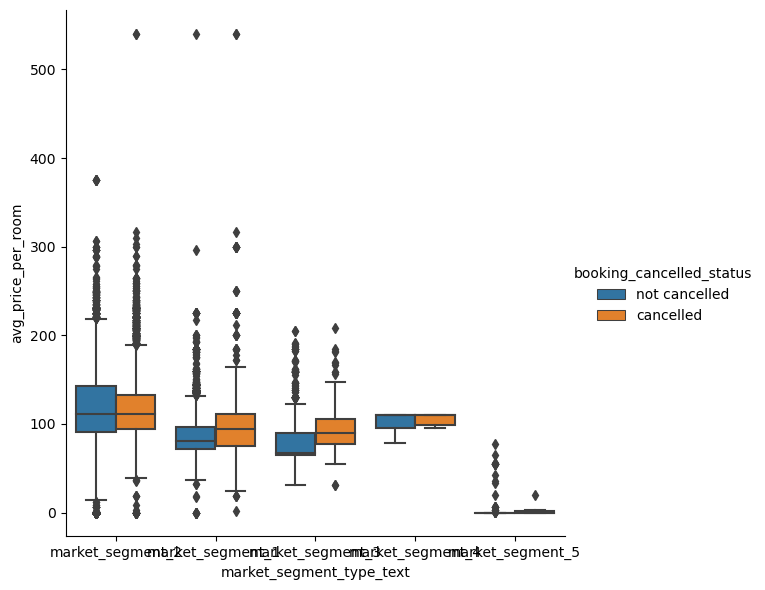

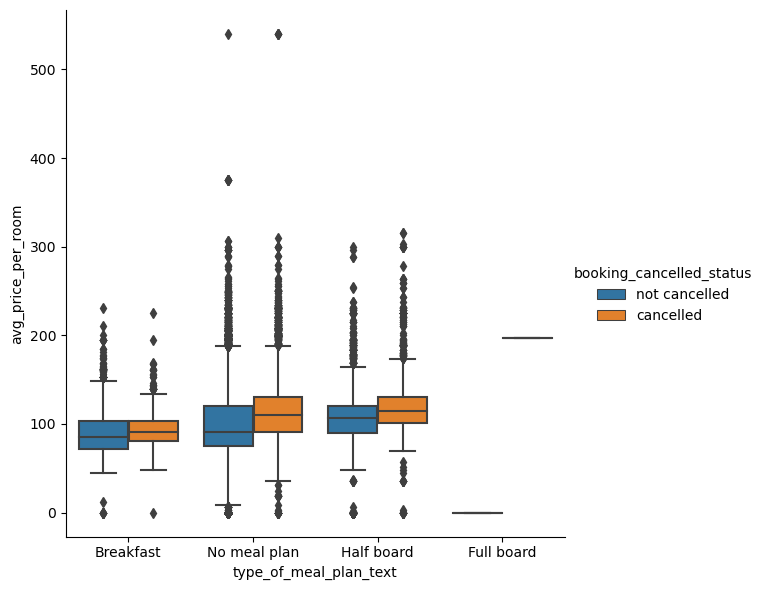

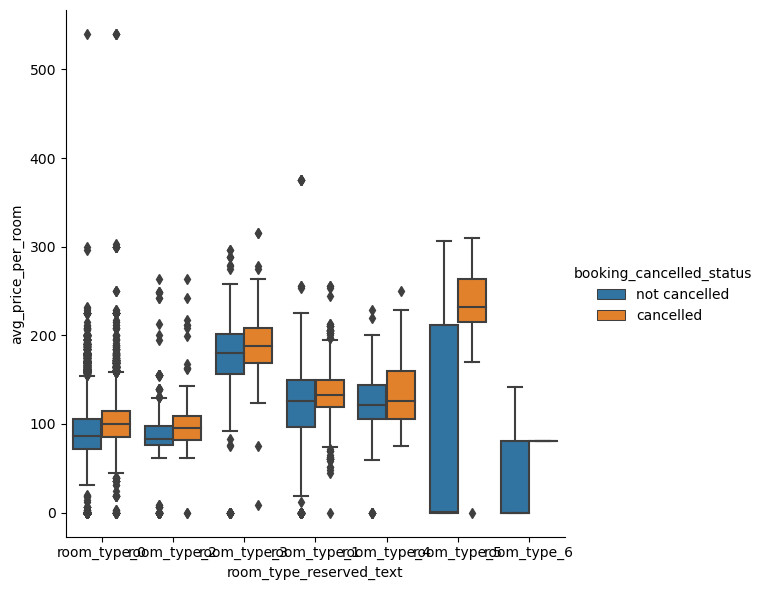

In [69]:
for feature in cat_features:
    sns.catplot(data=train, y="avg_price_per_room", 
                x=feature, 
                hue="booking_cancelled_status", 
                kind="box", height=6)

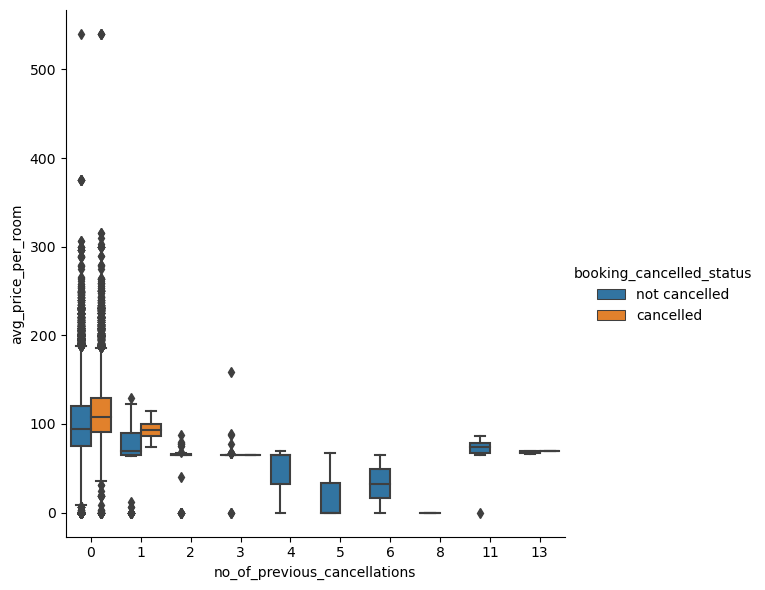

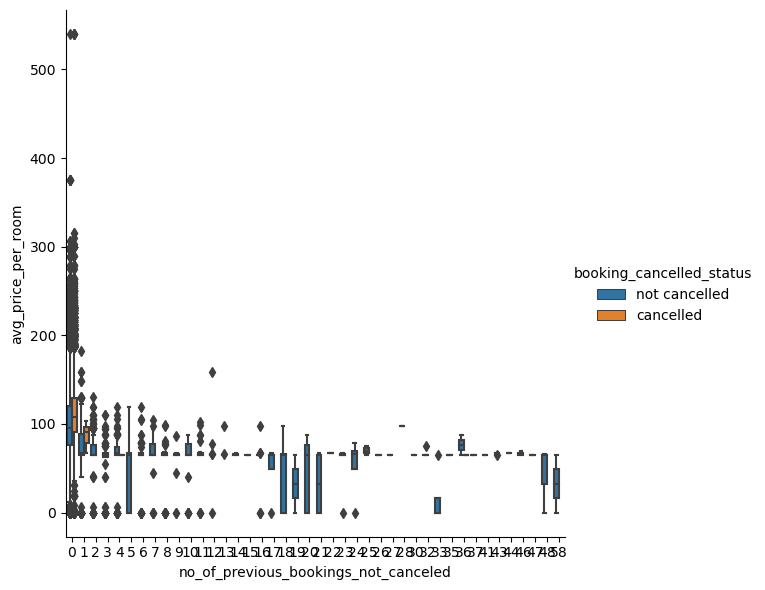

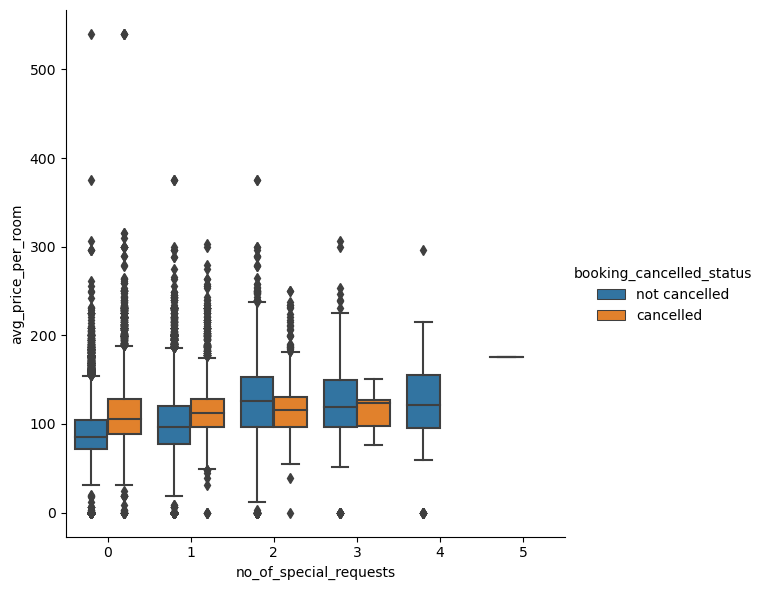

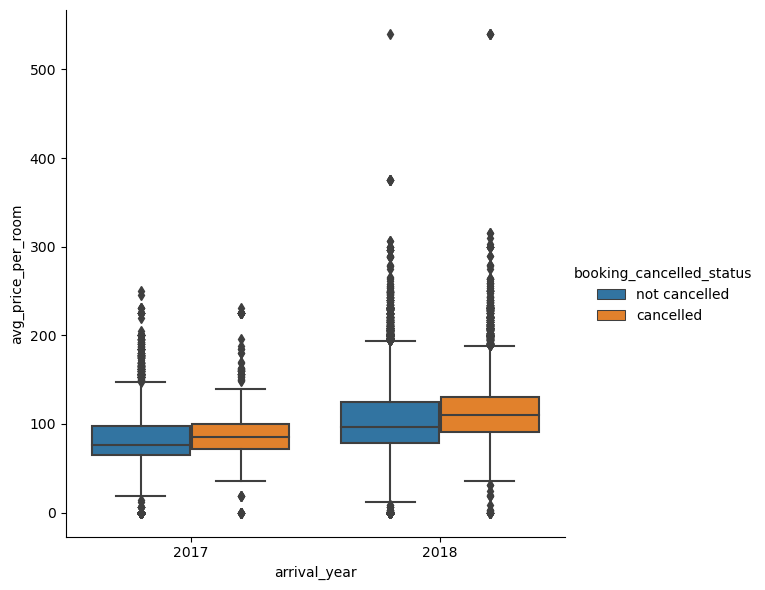

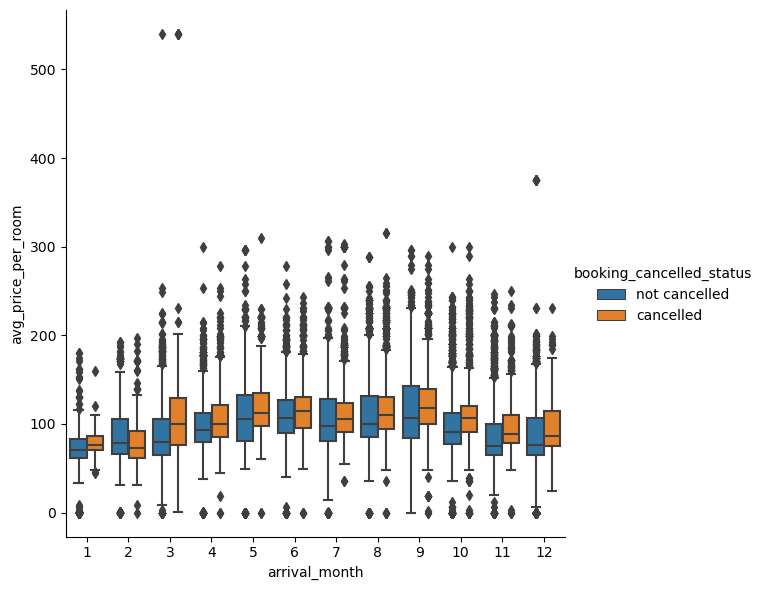

In [70]:
num_cols = ['no_of_previous_cancellations', 
            'no_of_previous_bookings_not_canceled', 
            'no_of_special_requests','arrival_year','arrival_month']

for feature in num_cols:
    sns.catplot(data=train, y="avg_price_per_room", 
                x=feature, 
                hue="booking_cancelled_status", 
                kind="box", height=6)

## Remove outliers

In [71]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe,columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        dataframe.loc[(dataframe[col] < low_limit), col] = low_limit
        dataframe.loc[(dataframe[col] > up_limit), col] = up_limit
replace_with_thresholds(train, num_features)

In [72]:
corr = train.corr()
corr.sort_values(['booking_status'], ascending=False, inplace=True)
corr.booking_status

booking_status                          1.000000
lead_time                               0.377281
avg_price_per_room                      0.163874
market_segment_type                     0.148776
total_cost                              0.141306
total_nights                            0.067583
total_families                          0.064336
no_of_week_nights                       0.060340
no_of_weekend_nights                    0.044368
arrival_month                           0.007639
arrival_date                            0.003124
room_type_reserved                     -0.015674
total_bookings                         -0.081142
no_of_special_requests                 -0.218567
no_of_adults                                 NaN
no_of_children                               NaN
type_of_meal_plan                            NaN
required_car_parking_space                   NaN
arrival_year                                 NaN
repeated_guest                               NaN
no_of_previous_cance

<AxesSubplot:xlabel='market_segment_type'>

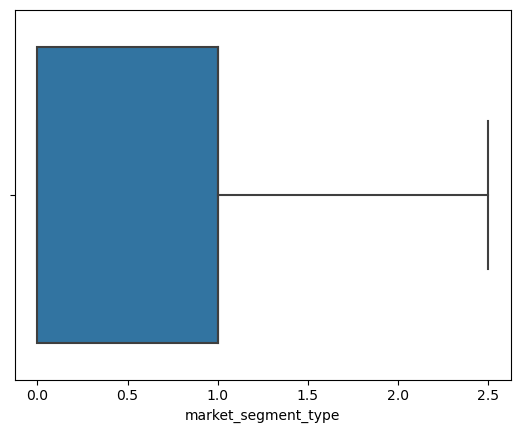

In [73]:
sns.boxplot(x=train["market_segment_type"])

<AxesSubplot:xlabel='avg_price_per_room'>

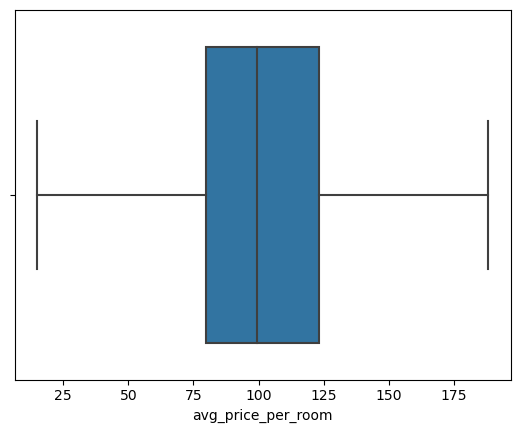

In [74]:
sns.boxplot(x=train["avg_price_per_room"])

<AxesSubplot:xlabel='lead_time'>

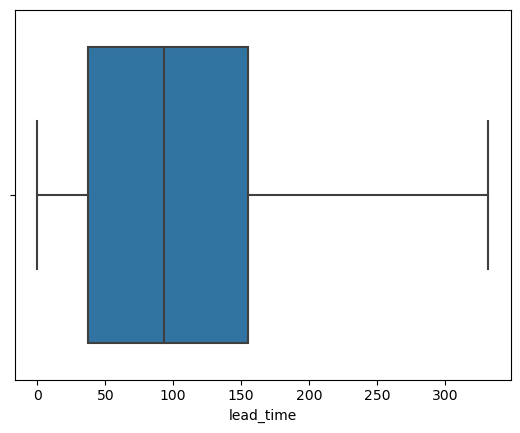

In [75]:
sns.boxplot(x=train["lead_time"])

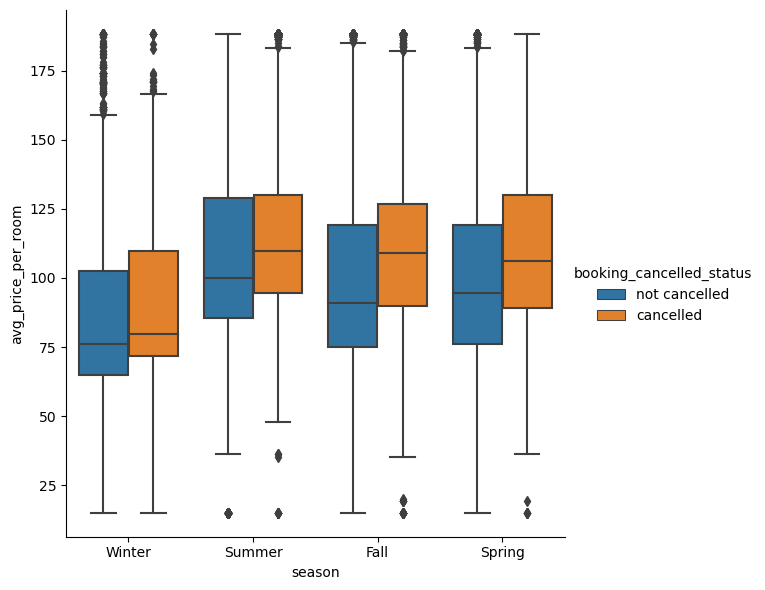

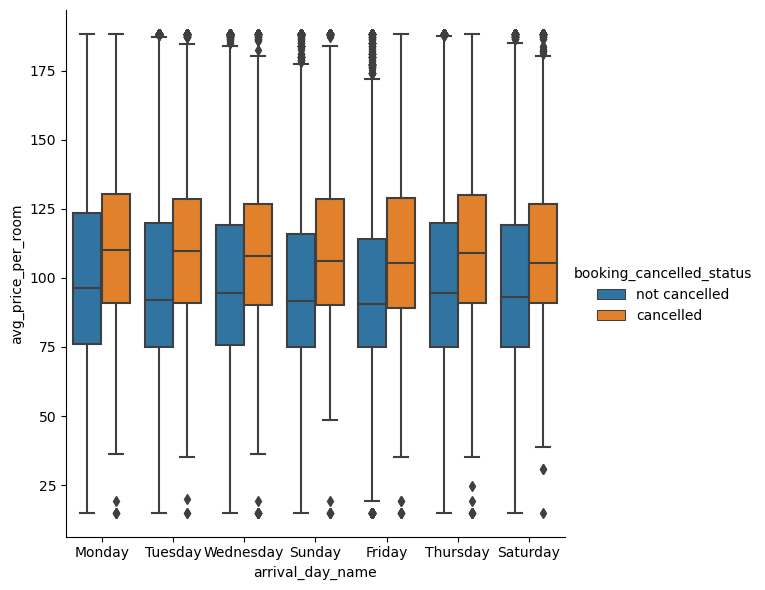

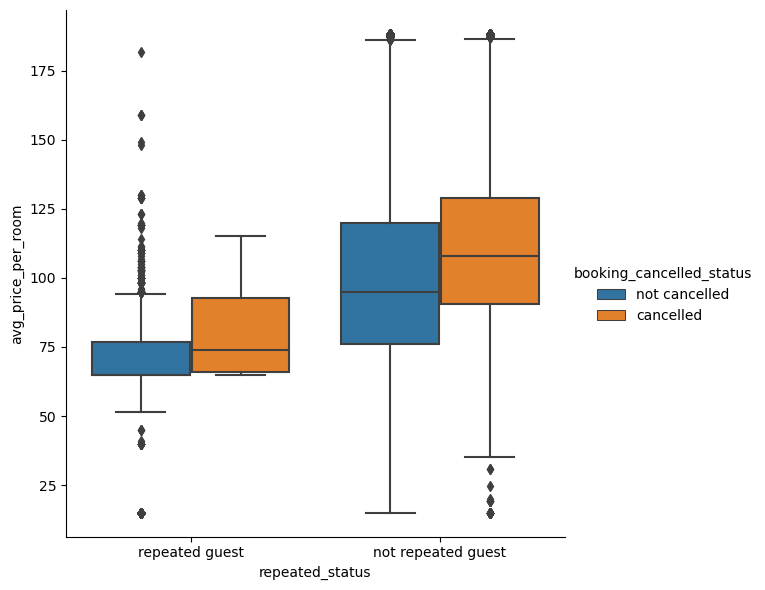

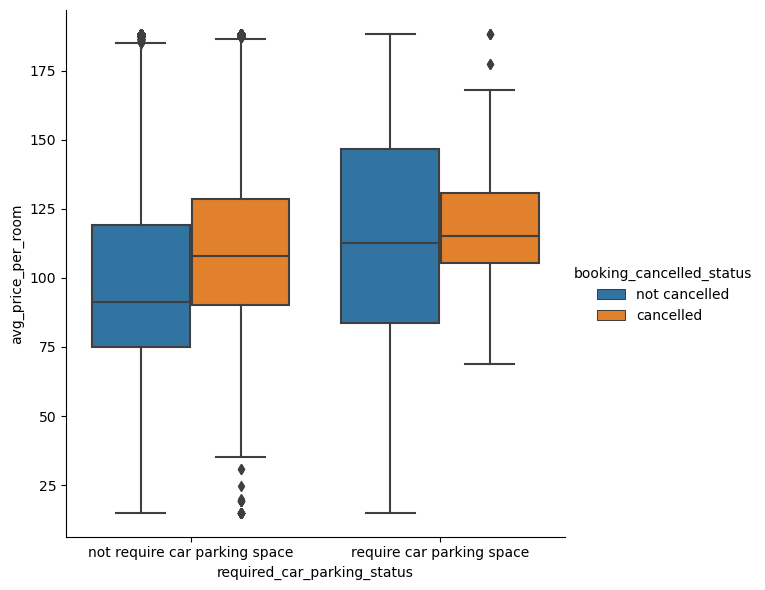

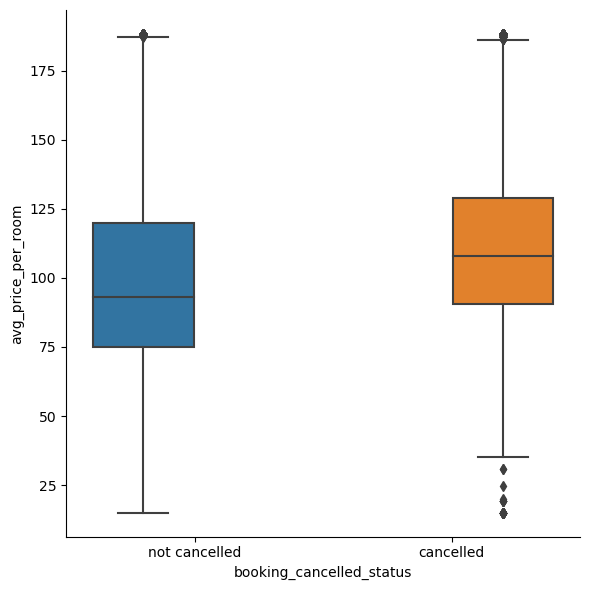

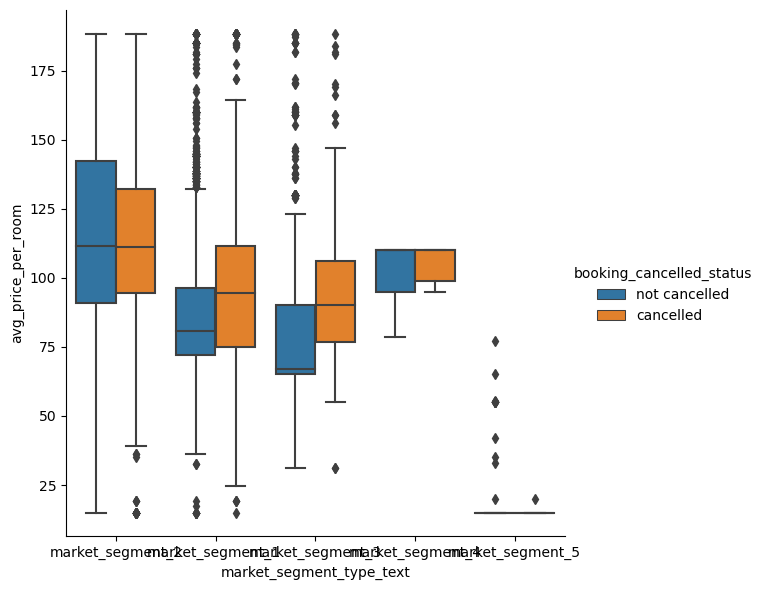

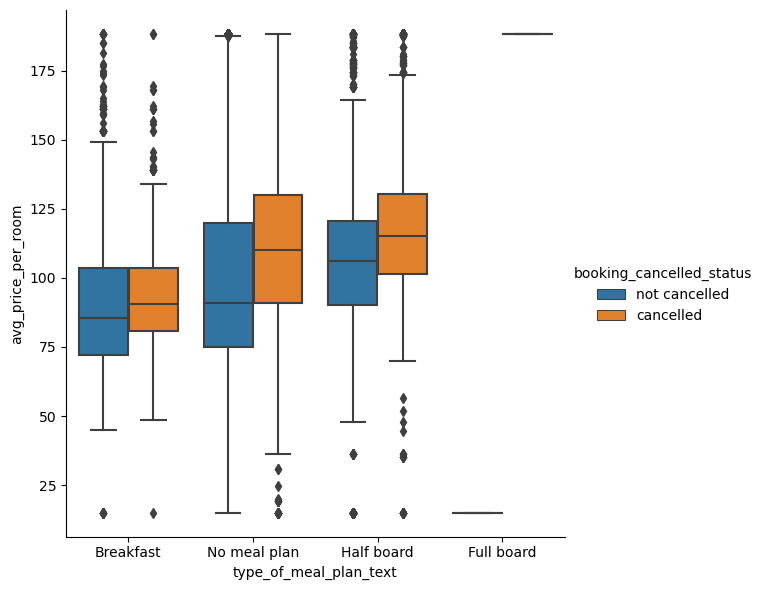

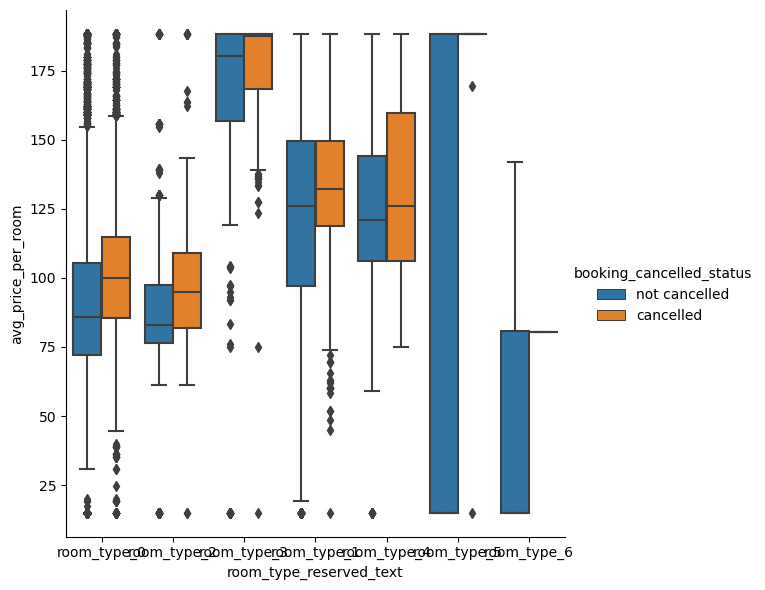

In [76]:
for feature in cat_features:
    sns.catplot(data=train, y="avg_price_per_room", 
                x=feature, 
                hue="booking_cancelled_status", 
                kind="box", height=6)

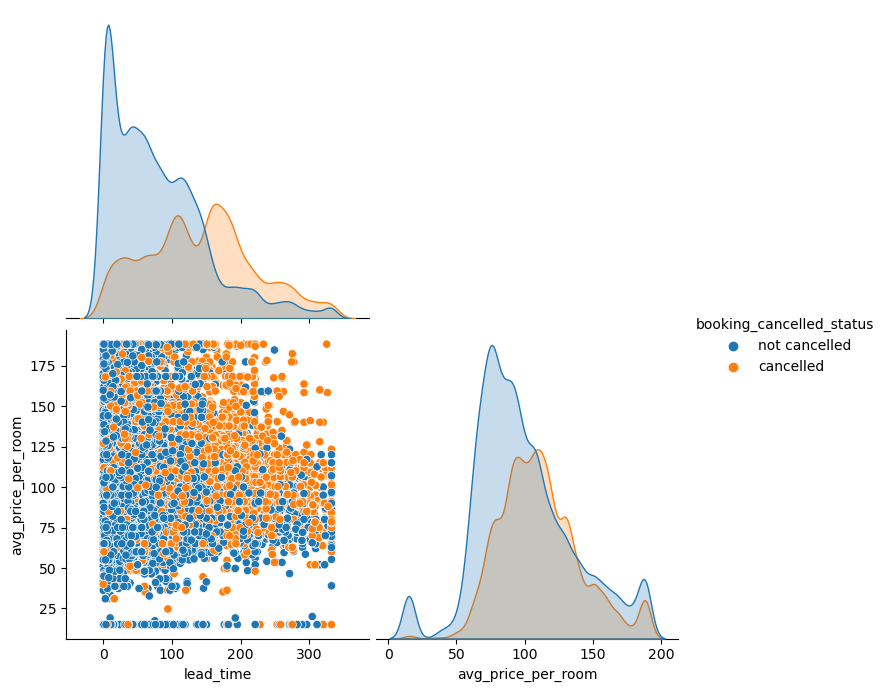

In [77]:
sns.pairplot(train[["lead_time", "avg_price_per_room", "booking_cancelled_status"]], 
             corner=True,
             height=3.5, hue="booking_cancelled_status");

# Classification Models

## Confusion matrix

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Drop the extra columns that we created

In [79]:
columns_to_drop = ["season","required_car_parking_status", "repeated_status", 
                   "booking_cancelled_status", "market_segment_type_text",
                  "type_of_meal_plan_text","room_type_reserved_text", "arrival_day_name"]

train.drop(columns_to_drop, axis=1, inplace=True)

In [80]:
train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_cost,total_bookings,total_families
0,2,0,0,2,0,0,0.0,9,2018,1,...,0,0,0,67.50,0.0,0.0,2,135.00,11,2
1,2,0,1,2,0,0,0.0,117,2018,7,...,0,0,0,72.25,0.0,0.0,3,216.75,0,2
2,2,0,0,1,0,0,0.0,315,2018,12,...,0,0,0,52.00,0.0,0.0,1,52.00,0,2
3,2,0,0,2,0,0,0.0,32,2018,12,...,0,0,0,56.00,0.0,0.0,2,112.00,0,1
4,2,0,1,0,0,0,0.0,258,2018,10,...,0,0,0,100.00,0.0,1.0,1,100.00,0,2


In [81]:
# X = train.drop(["booking_cancelled_status"], axis=1)
# y = train["booking_cancelled_status"]

# X = pd.get_dummies(X, drop_first=True)

In [82]:
X = train.drop(["booking_status"], axis=1) 
X = pd.get_dummies(X, drop_first=True)

le = LabelEncoder()
y = le.fit_transform(train["booking_status"])

In [83]:
y = train['booking_status'].values
y[0:5]

array([0., 0., 0., 0., 1.])

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                       index=X.columns,
                       dtype=float,)
print("Series before feature selection: \n\n{}\n".format(vif_series))

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Series before feature selection: 

no_of_adults                             0.000000
no_of_children                                NaN
no_of_weekend_nights                     9.419411
no_of_week_nights                       18.381549
type_of_meal_plan                             NaN
required_car_parking_space                    NaN
room_type_reserved                       1.500815
lead_time                                1.126099
arrival_year                             0.000000
arrival_month                            1.027590
arrival_date                             1.006103
market_segment_type                      1.240959
repeated_guest                                NaN
no_of_previous_cancellations                  NaN
no_of_previous_bookings_not_canceled          NaN
avg_price_per_room                       4.002101
no_of_special_requests                   1.160050
total_nights                            34.748472
total_cost                              11.422250
total_bookings 

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (29470, 21) (29470,)
Test set: (12630, 21) (12630,)


In [86]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,total_cost,total_bookings,total_families
0,2,0,0,2,0,0,0.0,9,2018,1,...,1.0,0,0,0,67.50,0.0,2,135.00,11,2
1,2,0,1,2,0,0,0.0,117,2018,7,...,0.0,0,0,0,72.25,0.0,3,216.75,0,2
2,2,0,0,1,0,0,0.0,315,2018,12,...,0.0,0,0,0,52.00,0.0,1,52.00,0,2
3,2,0,0,2,0,0,0.0,32,2018,12,...,1.0,0,0,0,56.00,0.0,2,112.00,0,1
4,2,0,1,0,0,0,0.0,258,2018,10,...,0.0,0,0,0,100.00,0.0,1,100.00,0,2


# Decision Tree

In [88]:
D_tree = DecisionTreeClassifier()

params = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}


search = GridSearchCV(D_tree, params, cv=5, n_jobs=-1)
bag = BaggingRegressor(base_estimator=search, n_estimators=100)
search.fit(X_train, y_train)
final_model = search.best_estimator_
print(f"Best Parameters:{final_model}")

Best Parameters:DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.0001)


In [89]:
D_tree = DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.0001).fit(X_train, y_train)

y_pred = D_tree.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy = {round(acc,3)}')

Accuracy = 0.809


              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85      7671
         1.0       0.77      0.73      0.75      4959

    accuracy                           0.81     12630
   macro avg       0.80      0.80      0.80     12630
weighted avg       0.81      0.81      0.81     12630

Confusion matrix, without normalization
[[6581 1090]
 [1318 3641]]


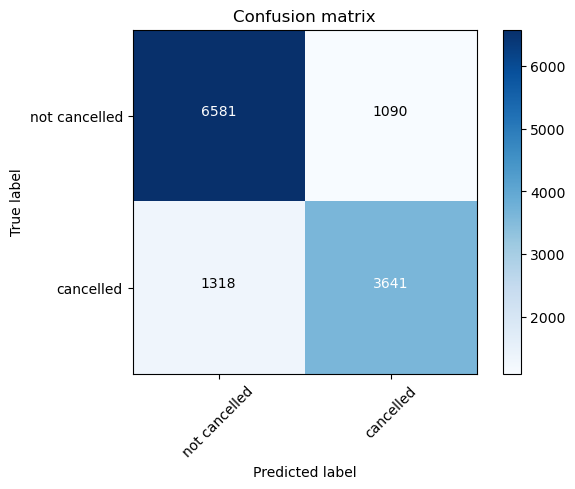

In [90]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not cancelled','cancelled'],normalize= False,  title='Confusion matrix')

In [91]:
importances = D_tree.feature_importances_
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)
importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
7,lead_time,0.393345
16,no_of_special_requests,0.233098
11,market_segment_type,0.176925
15,avg_price_per_room,0.126410
9,arrival_month,0.030396
18,total_cost,0.015363
10,arrival_date,0.005859
20,total_families,0.005290
19,total_bookings,0.003898
6,room_type_reserved,0.003329


<AxesSubplot:xlabel='importances', ylabel='features'>

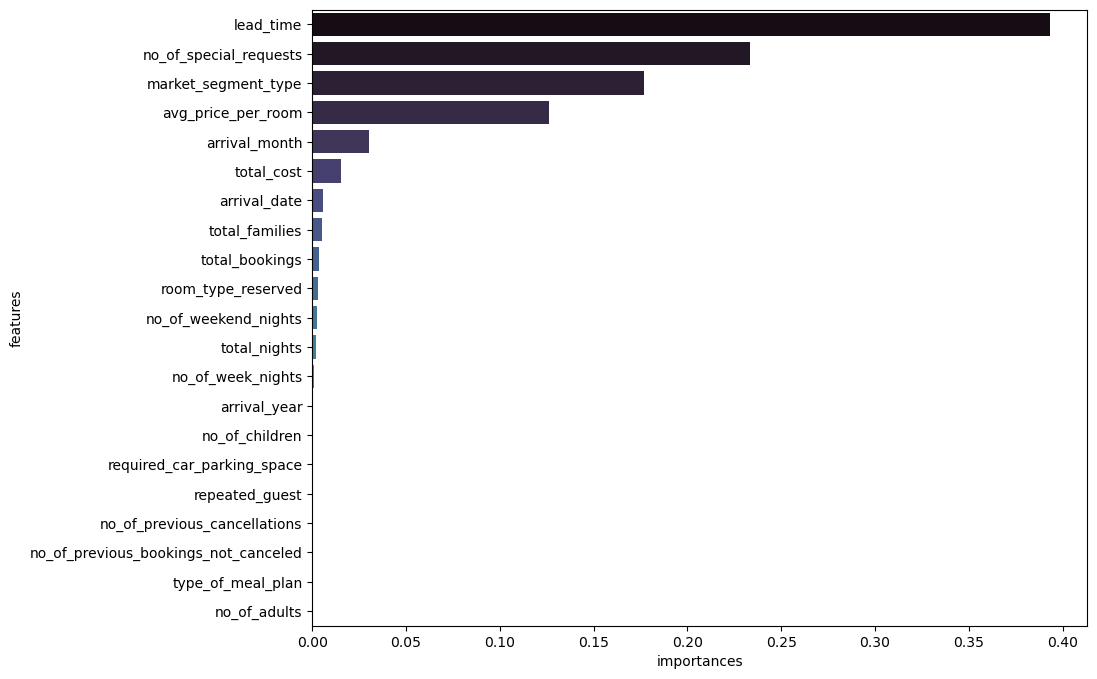

In [92]:
features = X.columns
importances = D_tree.feature_importances_
rfc_imp = pd.DataFrame()
rfc_imp['features'] = features;rfc_imp['importances'] = importances
plt.figure(figsize=(10, 8));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfc_imp.sort_values(by=['importances'],ascending=False), 
            x='importances',y='features',ax=ax1,palette = 'mako')

# XGBoost Classifier

In [93]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}
clf = xgb.XGBClassifier(**params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8133808392715756


              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      7671
         1.0       0.79      0.72      0.75      4959

    accuracy                           0.81     12630
   macro avg       0.81      0.80      0.80     12630
weighted avg       0.81      0.81      0.81     12630

Confusion matrix, without normalization
[[6718  953]
 [1404 3555]]


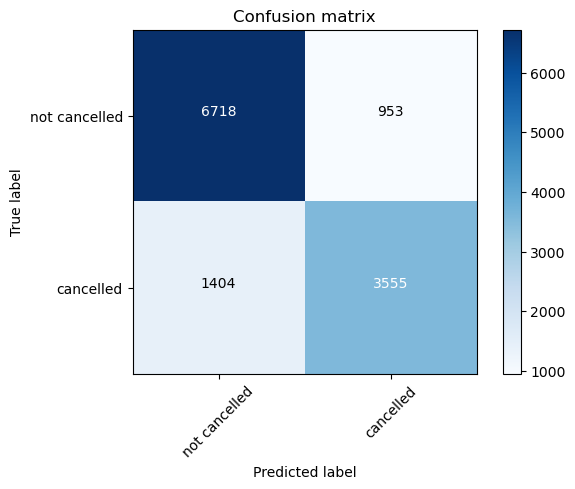

In [94]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not cancelled','cancelled'],normalize= False,  title='Confusion matrix')

In [95]:
train_score = clf.score(X_train, y_train)
print("Training accuracy of XGBoost model:", round(train_score, 3))

test_score = clf.score(X_test, y_test)
print("Testing accuracy of XGBoost model:", round(test_score, 3))

Training accuracy of XGBoost model: 0.816
Testing accuracy of XGBoost model: 0.813


In [96]:
importances = clf.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
11,market_segment_type,0.320572
16,no_of_special_requests,0.172334
7,lead_time,0.171173
15,avg_price_per_room,0.073898
19,total_bookings,0.055331
9,arrival_month,0.052541
6,room_type_reserved,0.039040
18,total_cost,0.029686
20,total_families,0.022831
2,no_of_weekend_nights,0.018705


<AxesSubplot:xlabel='importances', ylabel='features'>

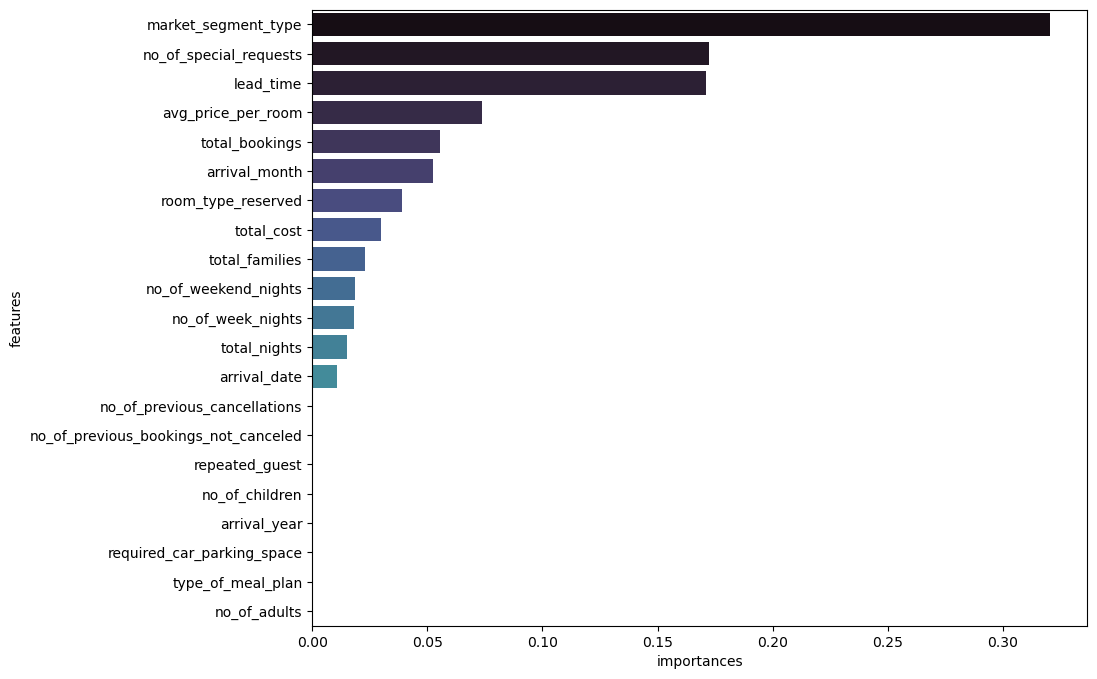

In [97]:
features = X.columns
importances = clf.feature_importances_
rfc_imp = pd.DataFrame()
rfc_imp['features'] = features;rfc_imp['importances'] = importances
plt.figure(figsize=(10, 8));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfc_imp.sort_values(by=['importances'],ascending=False), 
            x='importances',y='features',ax=ax1,palette = 'mako')

# LGBM Classifier

In [98]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'binary_logloss',
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0
       }

lgbm = lgb.LGBMClassifier(**params)

lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
scores = cross_val_score(lgbm, X, y, cv=5)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning]

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print('Cross-validation scores:', scores)
print('Mean score:', scores.mean())
print('Standard deviation:', scores.std())

Accuracy: 0.8169437846397466
Cross-validation scores: [0.82 0.82 0.81 0.82 0.81]
Mean score: 0.8155581947743468
Standard deviation: 0.003074151806542711


              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      7671
         1.0       0.79      0.73      0.76      4959

    accuracy                           0.82     12630
   macro avg       0.81      0.80      0.81     12630
weighted avg       0.82      0.82      0.82     12630

Confusion matrix, without normalization
[[6715  956]
 [1356 3603]]


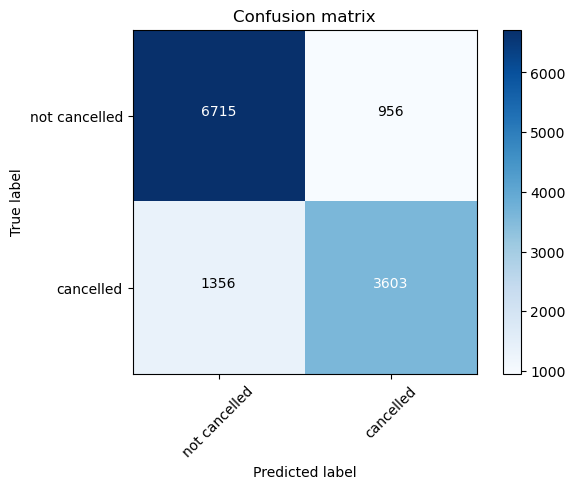

In [100]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not cancelled','cancelled'],normalize= False,  title='Confusion matrix')

In [101]:
importances = lgbm.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

importance_df.sort_values(by=['Feature Importance'],ascending=False,inplace=True)
importance_df

,Feature,Feature Importance
7,lead_time,637
15,avg_price_per_room,626
9,arrival_month,382
16,no_of_special_requests,339
18,total_cost,247
11,market_segment_type,213
10,arrival_date,124
20,total_families,91
6,room_type_reserved,85
19,total_bookings,75


<AxesSubplot:xlabel='importances', ylabel='features'>

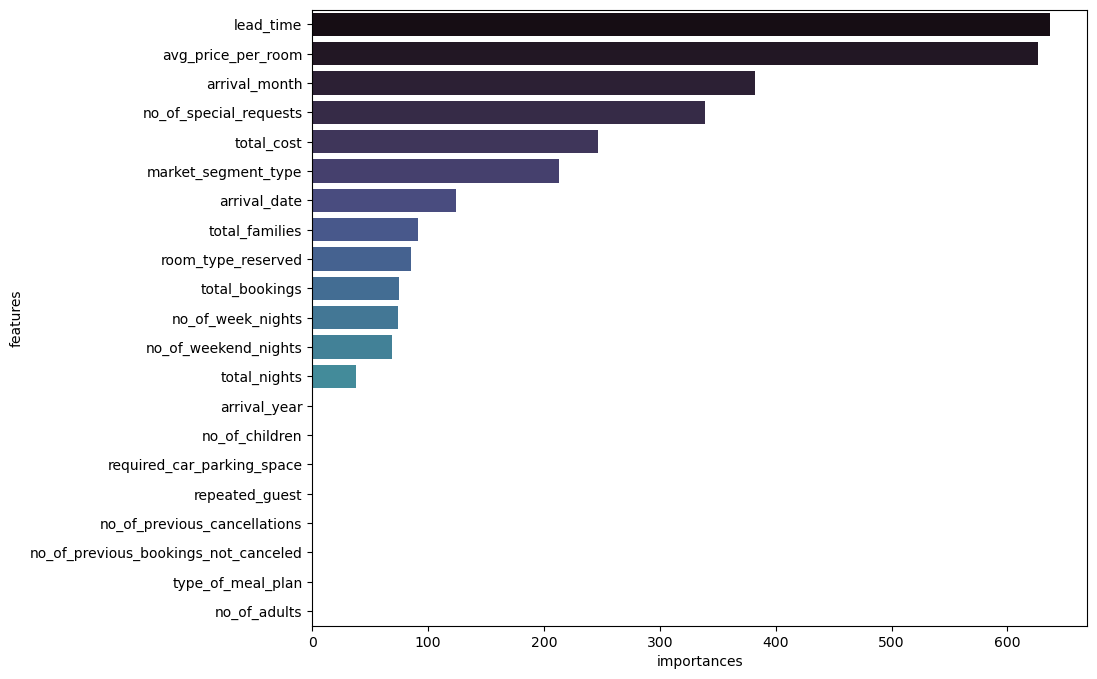

In [102]:
features = X.columns
importances = lgbm.feature_importances_
rfc_imp = pd.DataFrame()
rfc_imp['features'] = features;rfc_imp['importances'] = importances
plt.figure(figsize=(10, 8));ax1 = plt.subplot(1,1,1)
sns.barplot(data = rfc_imp.sort_values(by=['importances'],ascending=False), 
            x='importances',y='features',ax=ax1,palette = 'mako')

# Models Evaluation

In [103]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

def get_results(models):
    rows = []
    for model in models:
        dec = 3
        y_pred = model.predict(X_test)
        modelName = str(model)
        modelName = modelName[:modelName.find('(')]

        jacc = round(jaccard_score(y_test, y_pred, average='weighted'), dec)
        f1 = round(f1_score(y_test, y_pred, average='weighted'), dec)
        acc = round(metrics.accuracy_score(y_test, y_pred), dec)

        if model == D_tree:
            y_pred_prob = np.array([[round(item[0],4),round(item[1],3)]for item in D_tree.predict_proba(X_test)])
            log = round(log_loss(y_test,y_pred_prob),dec)
        elif model in [lgbm, clf]:
            y_pred_prob = model.predict_proba(X_test)
            log = round(log_loss(y_test, y_pred_prob), dec)
        else:
            log = 'NA'
        rows.append([modelName,jacc,f1,acc,log])

    results = pd.DataFrame(data=rows, columns=['Algorithm','Jaccard','F1-Score','Accuracy','LogLoss'])
    return results

In [104]:
models = [lgbm,clf,D_tree]
results_df = get_results(models)
print(results_df)

                Algorithm  Jaccard  F1-Score  Accuracy  LogLoss
0          LGBMClassifier    0.691     0.815     0.817    0.411
1           XGBClassifier    0.686     0.812     0.813    0.415
2  DecisionTreeClassifier    0.681     0.808     0.809    0.480


In [105]:
results_df = pd.melt(results_df, id_vars="Algorithm", var_name="Eval_Metric", value_name="Value")
results_df = results_df.drop(results_df[results_df['Eval_Metric'] == 'LogLoos'].index)
results_df

,Algorithm,Eval_Metric,Value
0,LGBMClassifier,Jaccard,0.691
1,XGBClassifier,Jaccard,0.686
2,DecisionTreeClassifier,Jaccard,0.681
3,LGBMClassifier,F1-Score,0.815
4,XGBClassifier,F1-Score,0.812
5,DecisionTreeClassifier,F1-Score,0.808
6,LGBMClassifier,Accuracy,0.817
7,XGBClassifier,Accuracy,0.813
8,DecisionTreeClassifier,Accuracy,0.809
9,LGBMClassifier,LogLoss,0.411


# Test set

In [106]:
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [107]:
# test = pd.concat([test.drop('id', axis = 1)], axis = 0)
# test.reset_index(drop = True, inplace = True)
# test.drop_duplicates(inplace = True)
# test

In [108]:
test['total_nights'] = test['no_of_weekend_nights'] + test['no_of_week_nights']
test['total_cost'] = test['total_nights'] * test['avg_price_per_room']
test['total_bookings'] = test['no_of_previous_cancellations'] + test['no_of_previous_bookings_not_canceled']
test['total_families'] = test['no_of_adults'] + test['no_of_children']
test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,total_cost,total_bookings,total_families
0,3,0,1,4,0,0,1,111,2018,12,...,1,0,0,0,115.60,2,5,578.00,0,3
1,2,0,0,3,0,0,0,22,2017,10,...,0,0,0,0,85.00,0,3,255.00,0,2
2,2,2,0,1,0,0,3,18,2018,8,...,1,0,0,0,240.00,1,1,240.00,0,4
3,2,0,0,3,0,0,0,88,2018,5,...,0,0,0,0,80.75,0,3,242.25,0,2
4,1,0,0,2,2,0,0,7,2018,9,...,1,0,0,0,144.00,0,2,288.00,0,1


In [109]:
num_features = np.array([i for i in test.columns.tolist() if test[i].dtype != 'object'])
num_features

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'total_nights', 'total_cost',
       'total_bookings', 'total_families'], dtype='<U36')

In [110]:
replace_with_thresholds(test, num_features)

In [111]:
y_pred = lgbm.predict_proba(test)[:,1]
y_pred[:5]

array([0.72, 0.46, 0.66, 0.46, 0.8 ])

In [112]:
submission = pd.DataFrame({"Id":test.index, "booking_status":y_pred})
subm = pd.read_csv('data/sample_submission.csv')
subm['booking_status'] = submission['booking_status']

In [113]:
subm.to_csv('data/submission.csv', index=False)